In [39]:
import aiapy
import astropy
import astropy.time
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sunpy
import sunpy.map
# from aiapy.calibrate import (
#     correct_degradation,
#     degradation,
#     estimate_error,
#     fetch_spikes,
#     normalize_exposure,
#     register,
#     respike,
#     update_pointing,
# )
from aiapy.calibrate.util import get_correction_table
from aiapy.psf import deconvolve, psf
from aiapy.response import Channel
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, LogStretch, time_support
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time

# Increases the figure size in this notebook.
mpl.rcParams["savefig.dpi"] = 400
mpl.rcParams["figure.dpi"] = 400

In [11]:
t_start = parse_time("2022-08-19T20:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom) | a.Wavelength(1600 * u.angstrom),
)
search_results

<sunpy.net.fido_factory.UnifiedResponse object at 0x15edb7e00>
Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2022-08-19 20:30:09.000 2022-08-19 20:30:10.000    SDO ...    FULLDISK 64.64844

In [13]:
files = Fido.fetch(search_results, max_conn=1)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2022_08_19T20_30_09.35Z.image_lev1.fits:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

In [21]:
files

['/Users/coletamburri/sunpy/data/aia.lev1.171A_2022_08_19T20_30_09.35Z.image_lev1.fits']

In [23]:
m_171 = sunpy.map.Map(files[0])

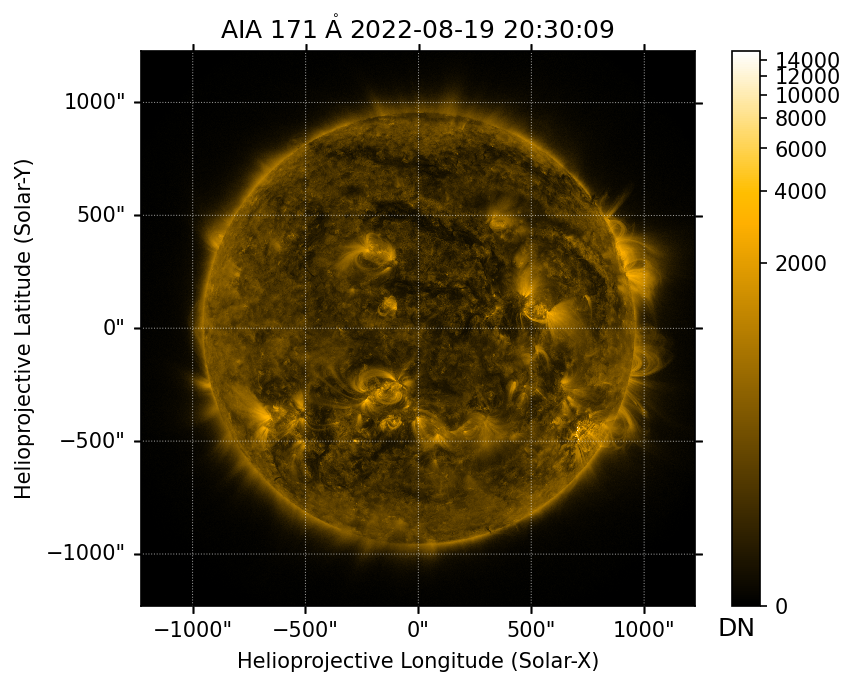

In [25]:
m_171.peek(vmin=0)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

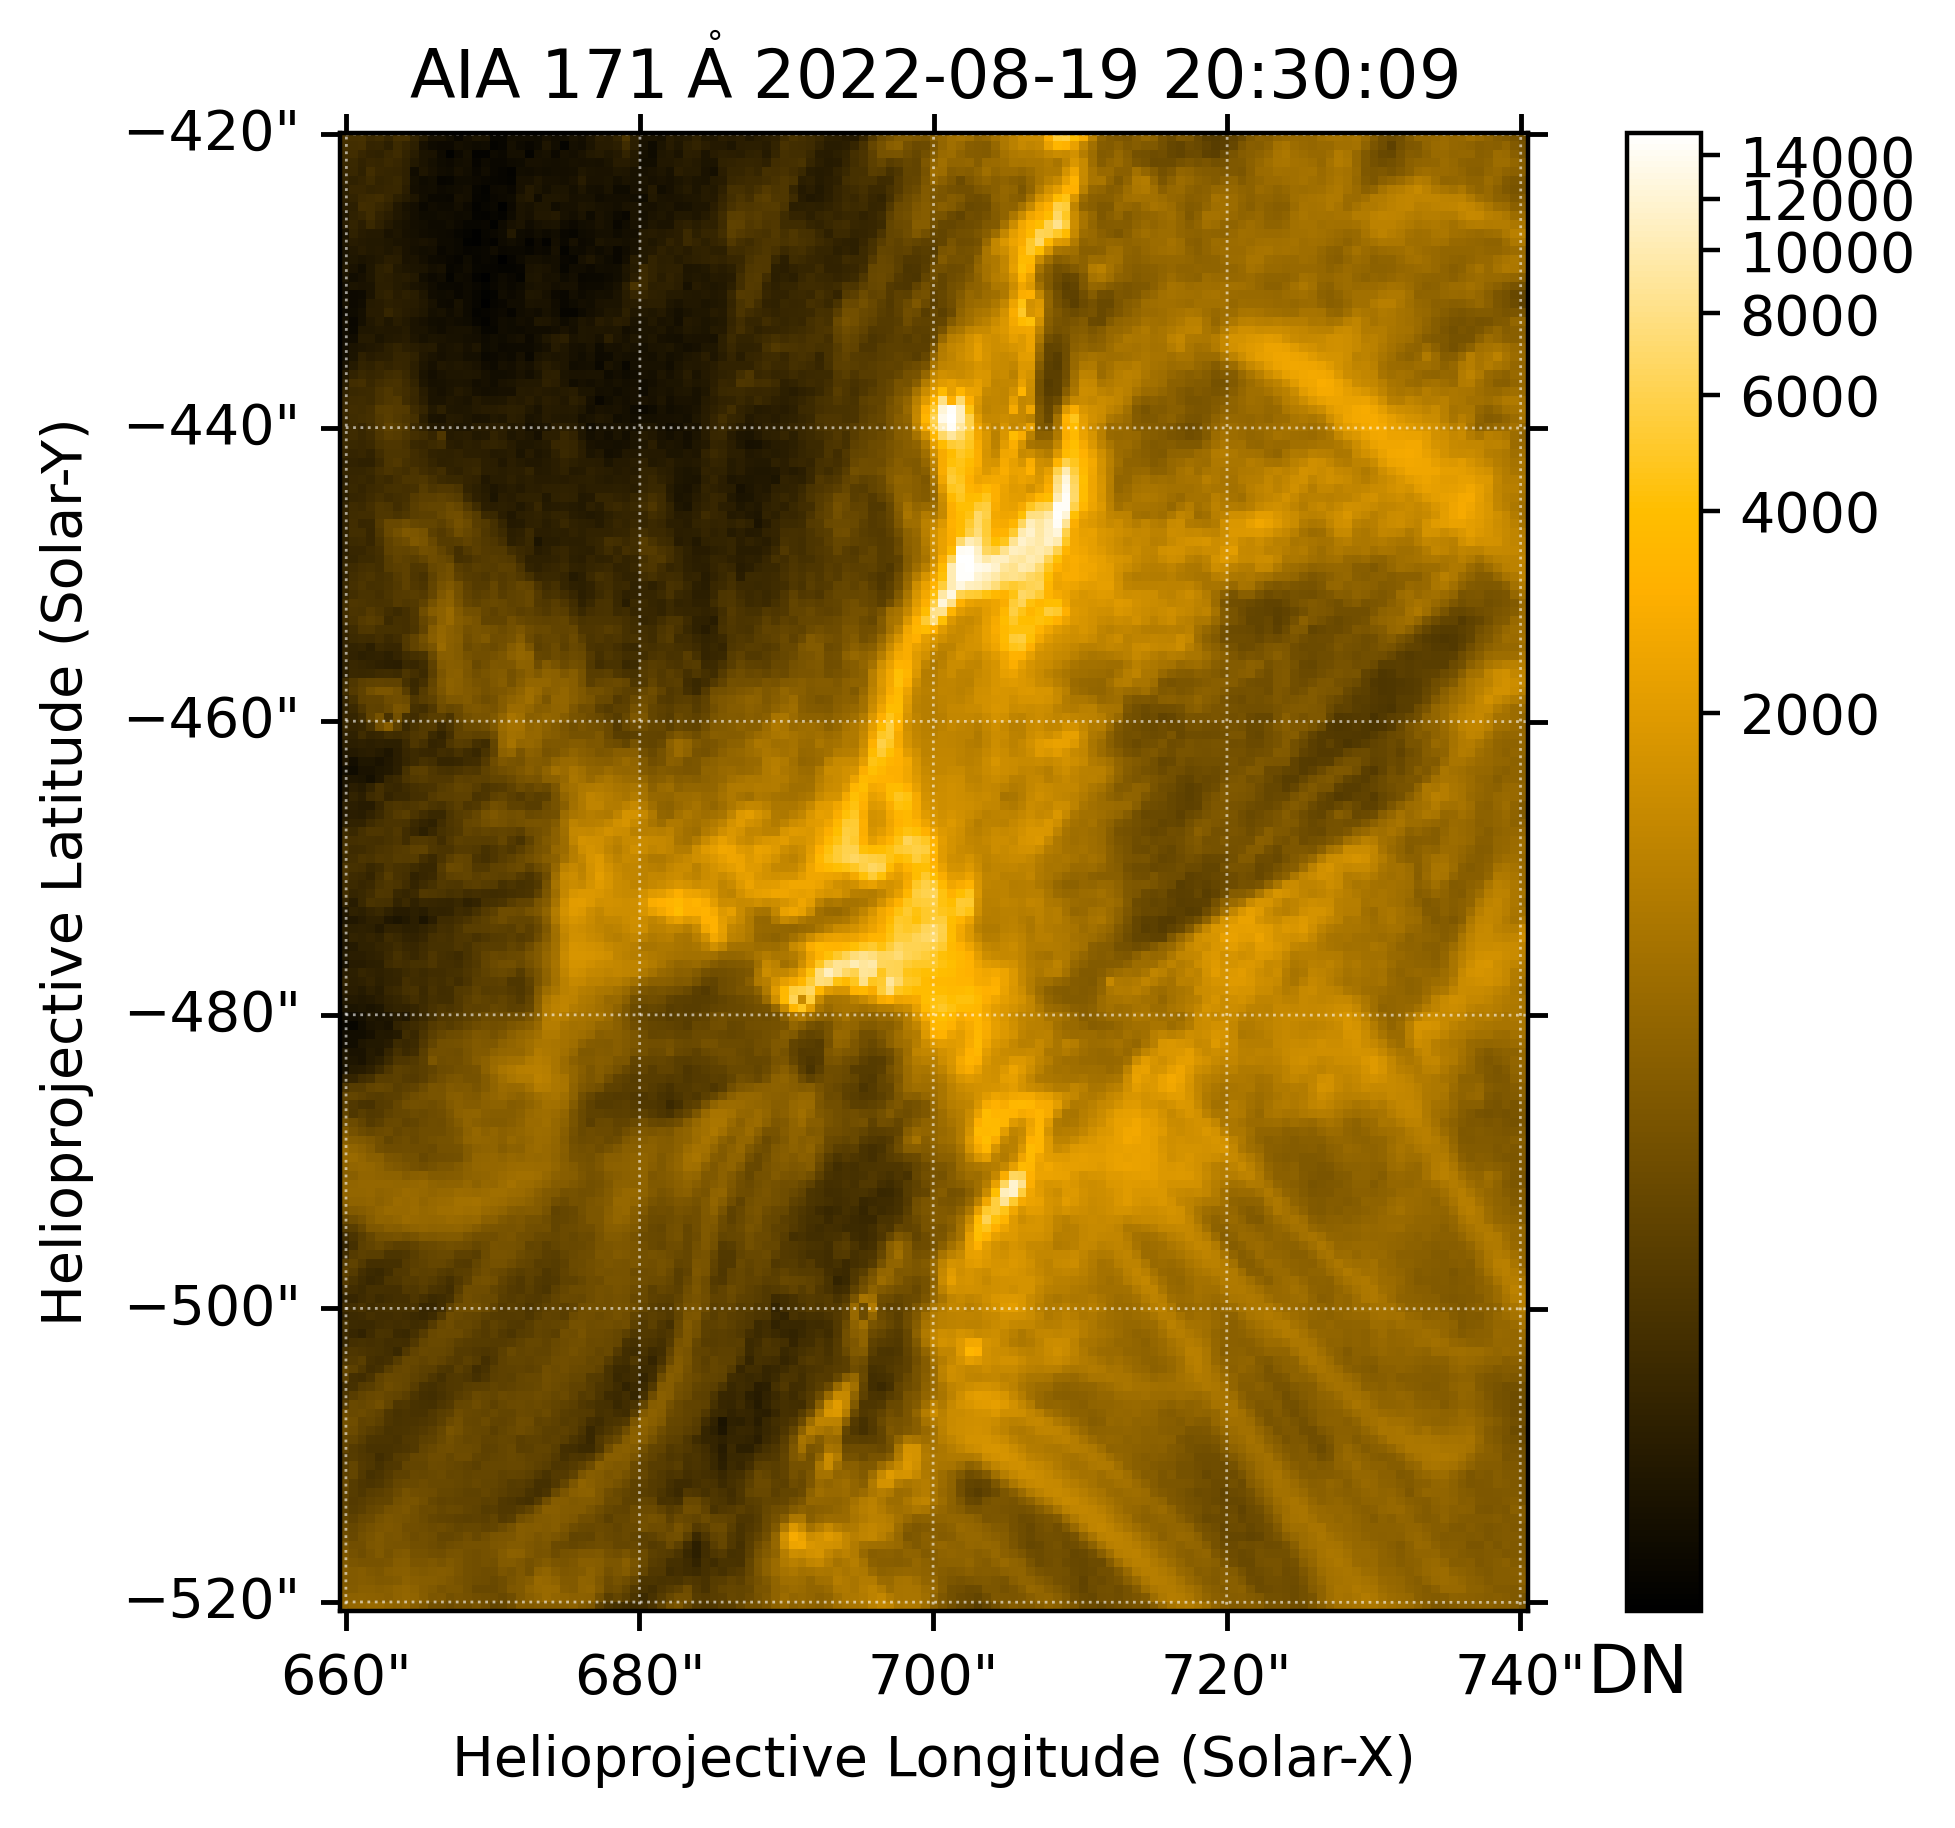

In [47]:
t_start = parse_time("2022-08-19T20:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom) | a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_171 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_171.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_171_cutout = m_171.submap(blc, **fov)
m_171_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.131A_2022_08_19T20_30_10.12Z.image_lev1.fits:   0%|          | 0.00/7.15M [00:00<?, ?B/s]

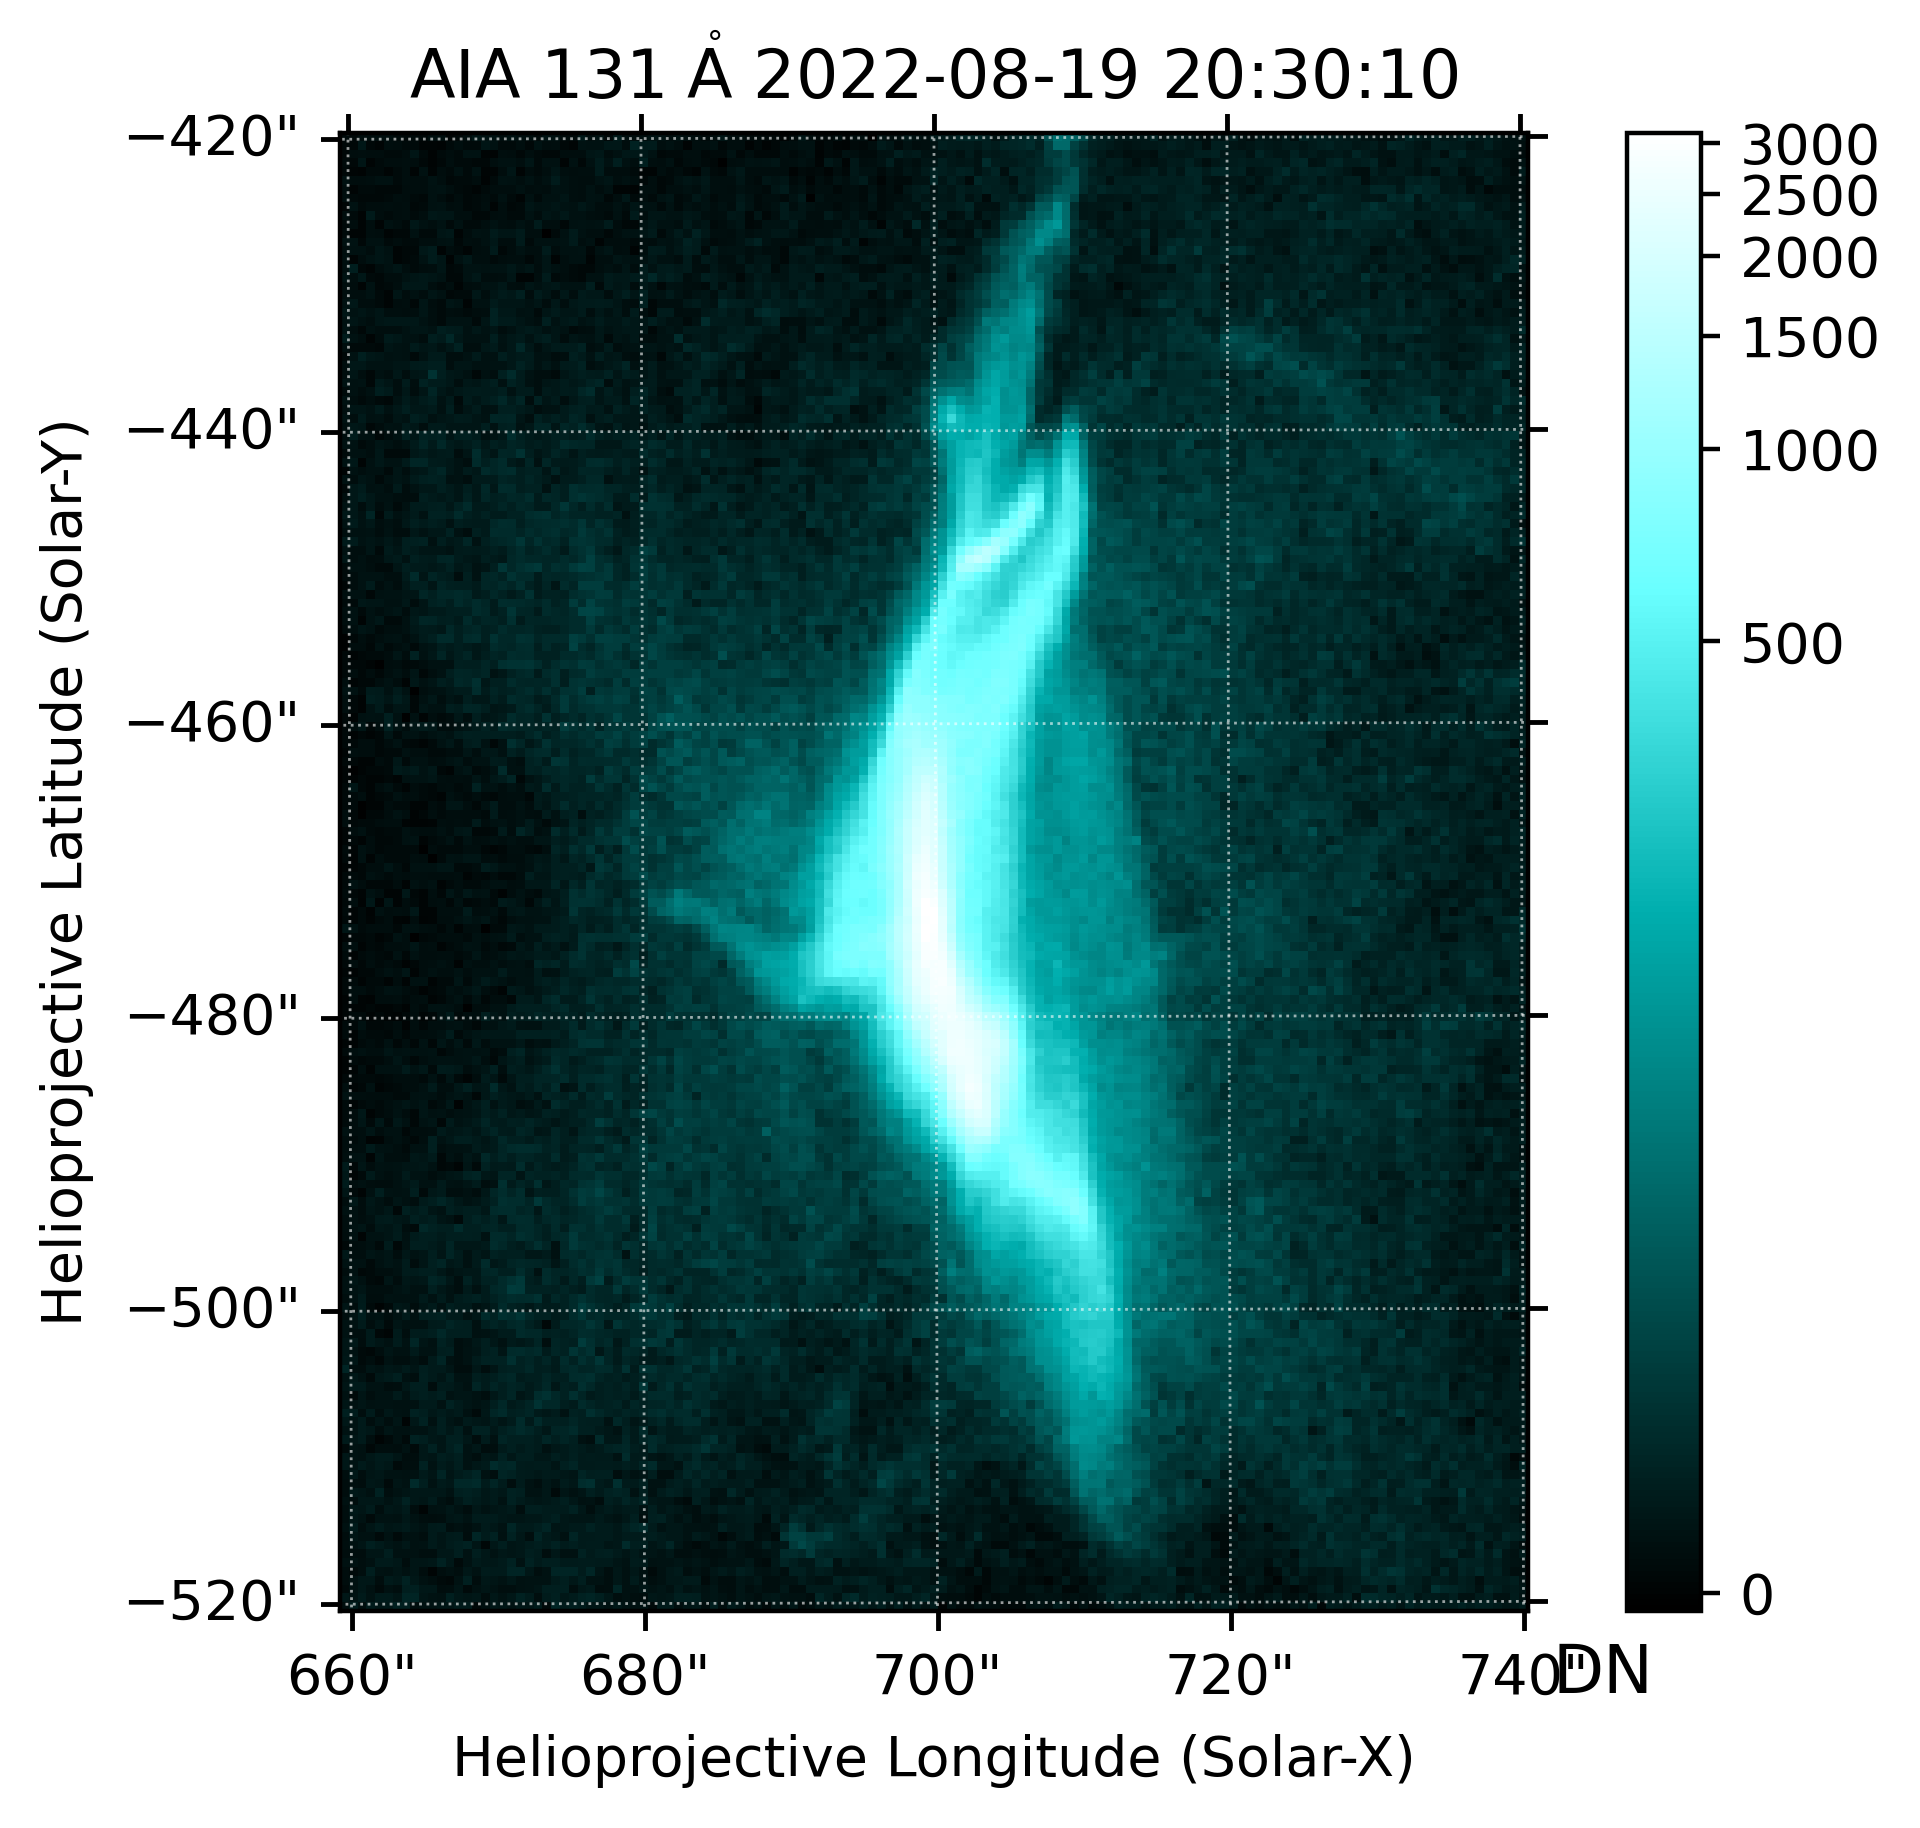

In [65]:
t_start = parse_time("2022-08-19T20:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(131 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_131 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_131.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_131_cutout = m_131.submap(blc, **fov)
m_131_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.1600A_2022_08_19T20_30_14.13Z.image_lev1.fits:   0%|          | 0.00/8.63M [00:00<?, ?B/s]

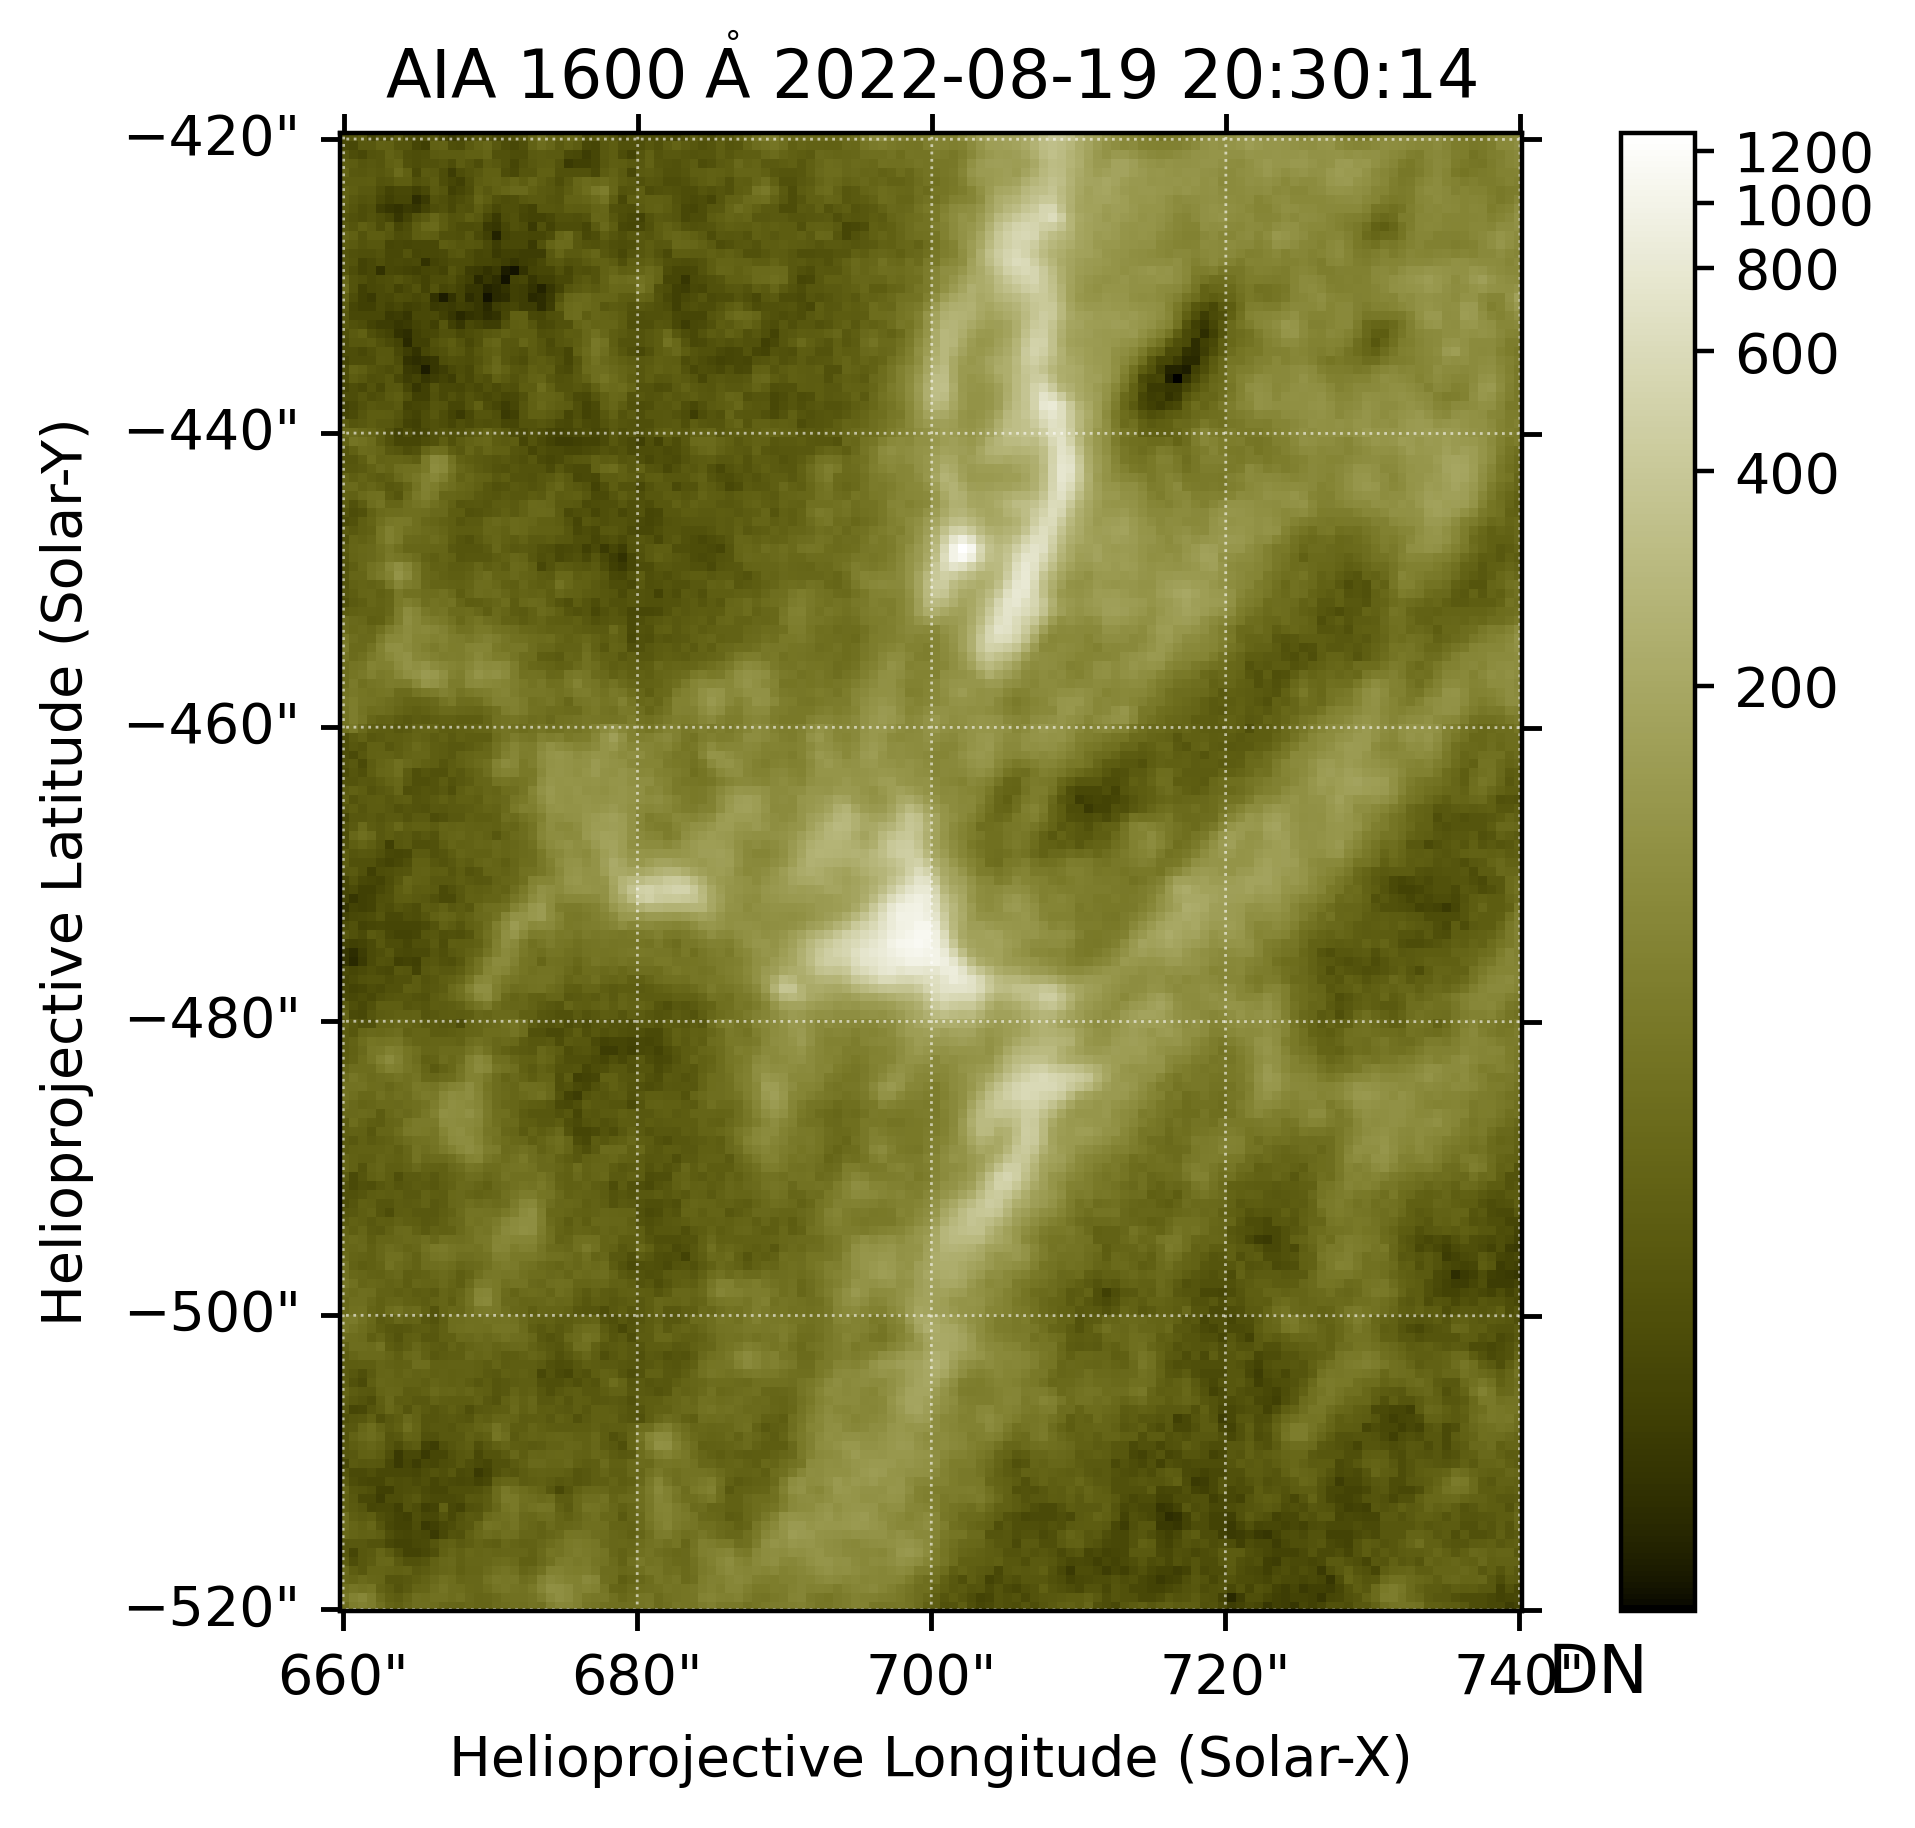

In [75]:
t_start = parse_time("2022-08-19T20:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 30 * u.s),
    a.Instrument.aia,
    a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_1600 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_1600.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_1600_cutout = m_1600.submap(blc, **fov)
m_1600_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

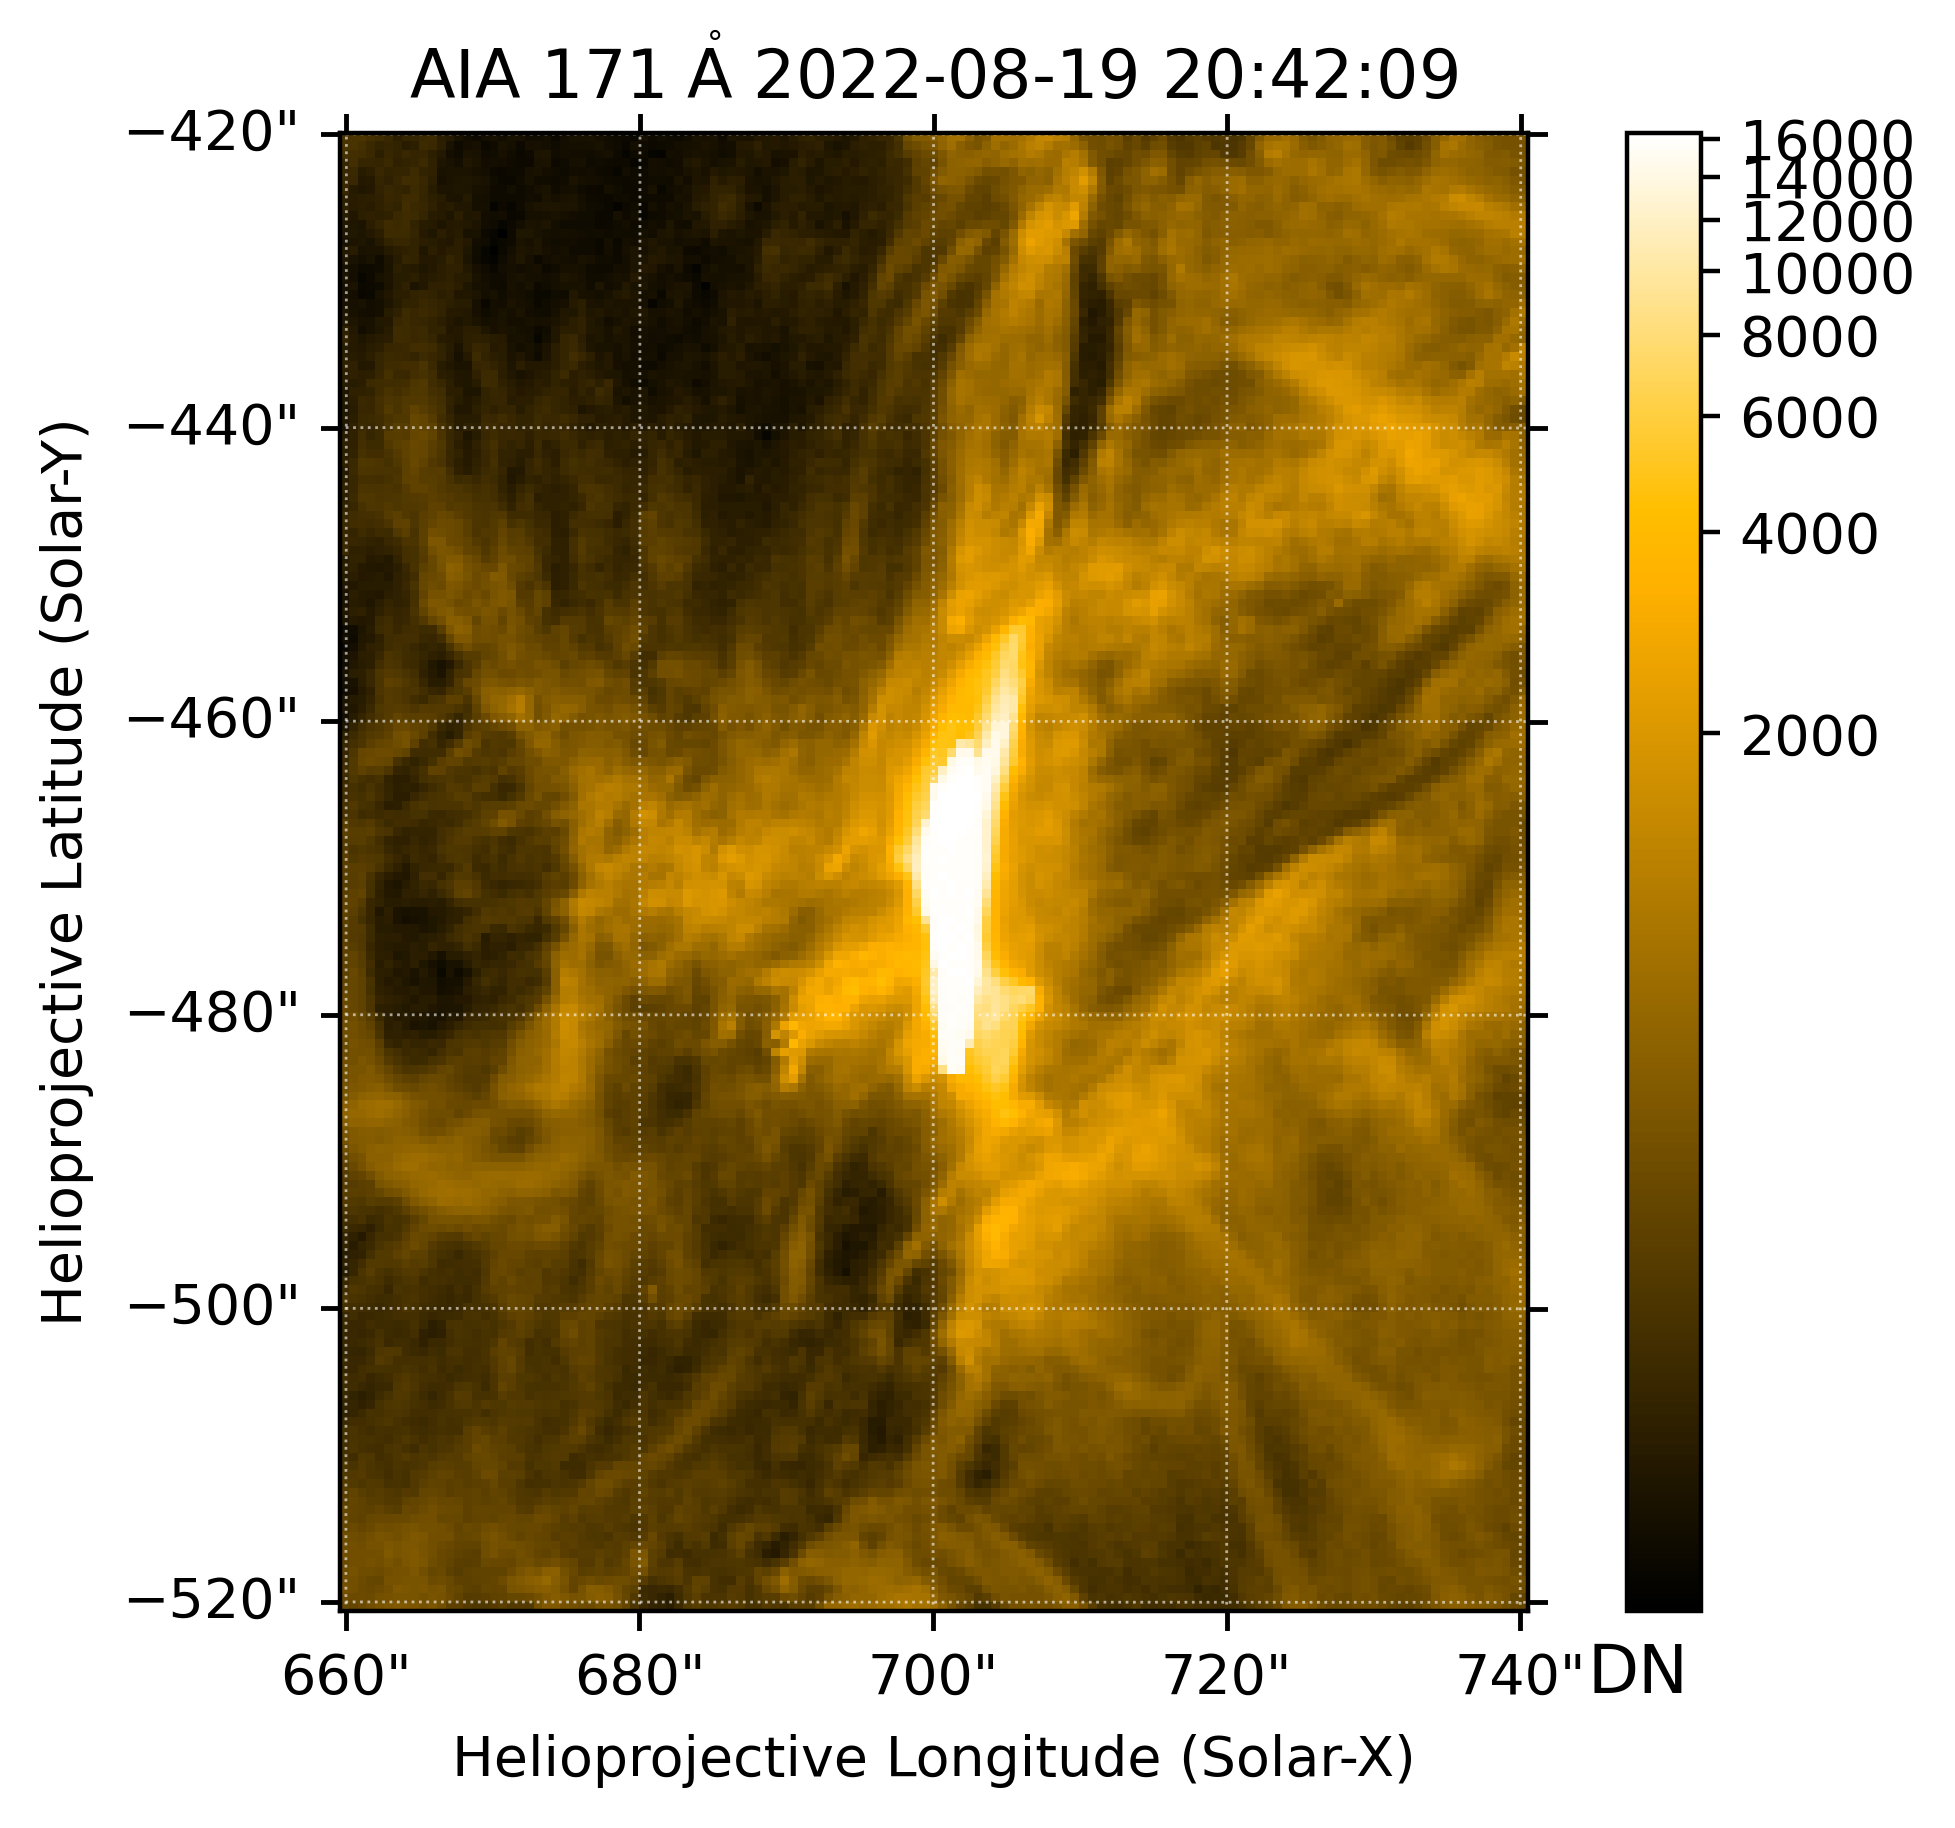

In [48]:
t_start = parse_time("2022-08-19T20:42:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom) | a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_171 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_171.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_171_cutout = m_171.submap(blc, **fov)
m_171_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.131A_2022_08_19T20_42_06.62Z.image_lev1.fits:   0%|          | 0.00/8.29M [00:00<?, ?B/s]

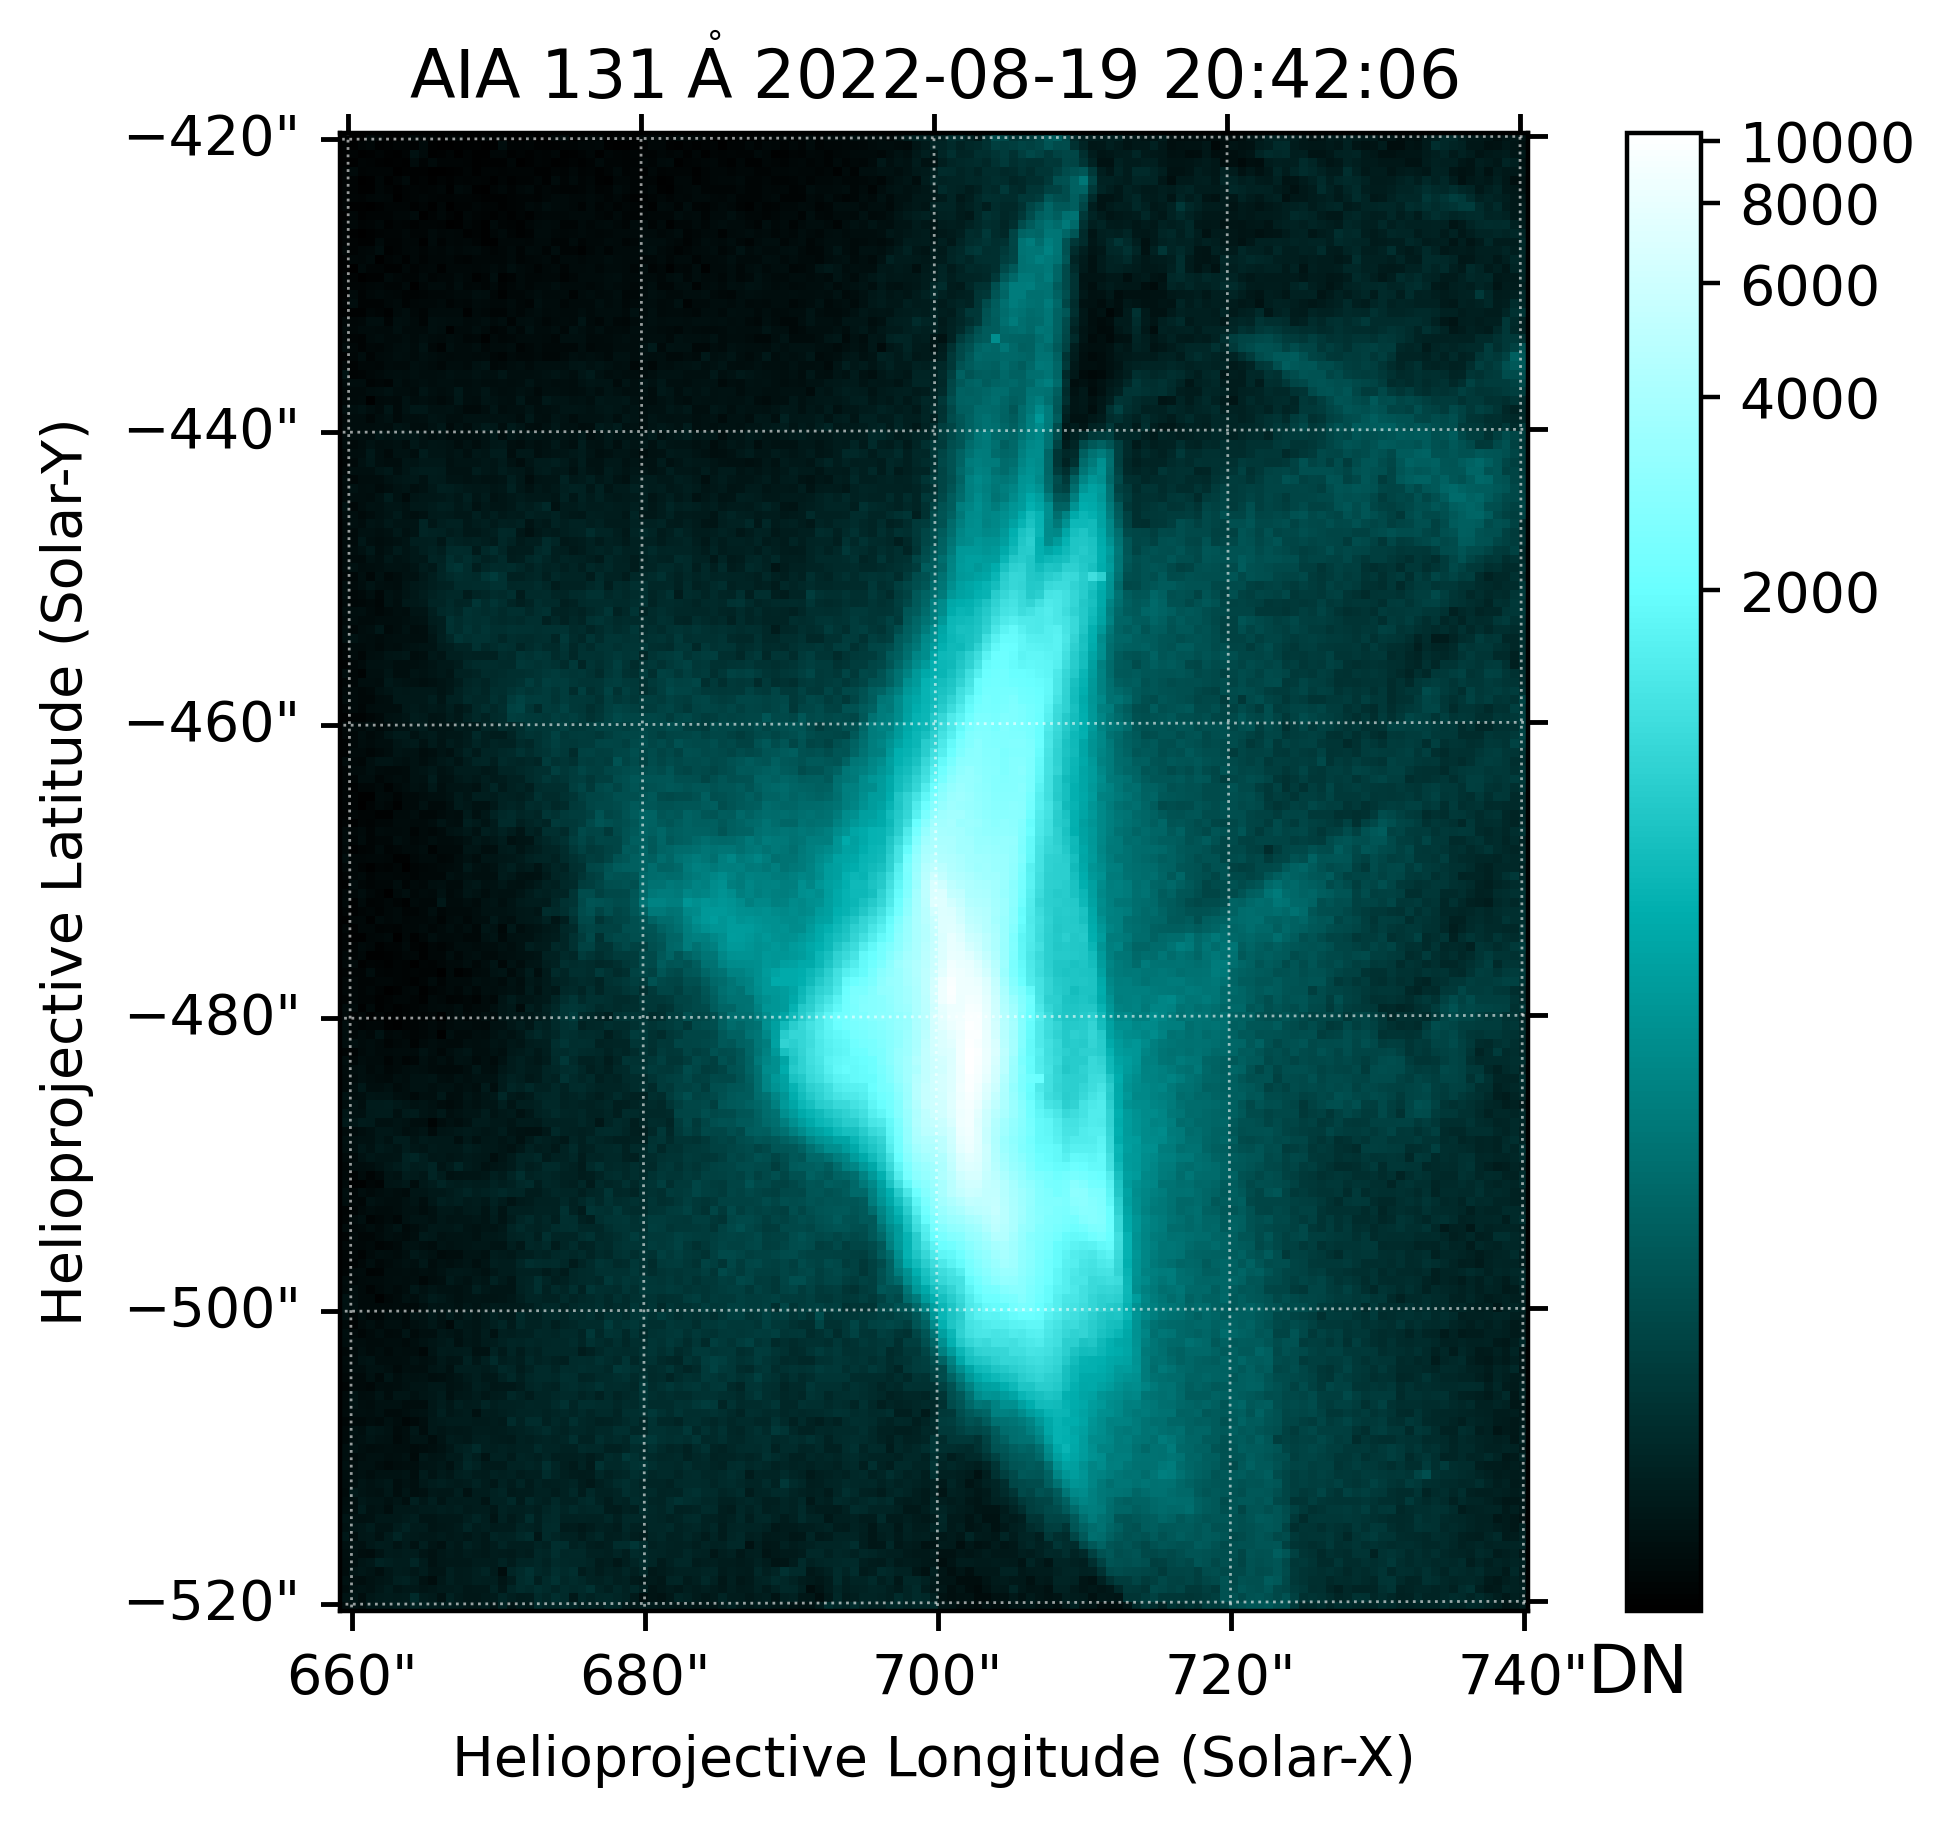

In [53]:
t_start = parse_time("2022-08-19T20:42:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(131 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_131 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_131.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_131_cutout = m_171.submap(blc, **fov)
m_131_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.1600A_2022_08_19T20_42_14.13Z.image_lev1.fits:   0%|          | 0.00/8.63M [00:00<?, ?B/s]

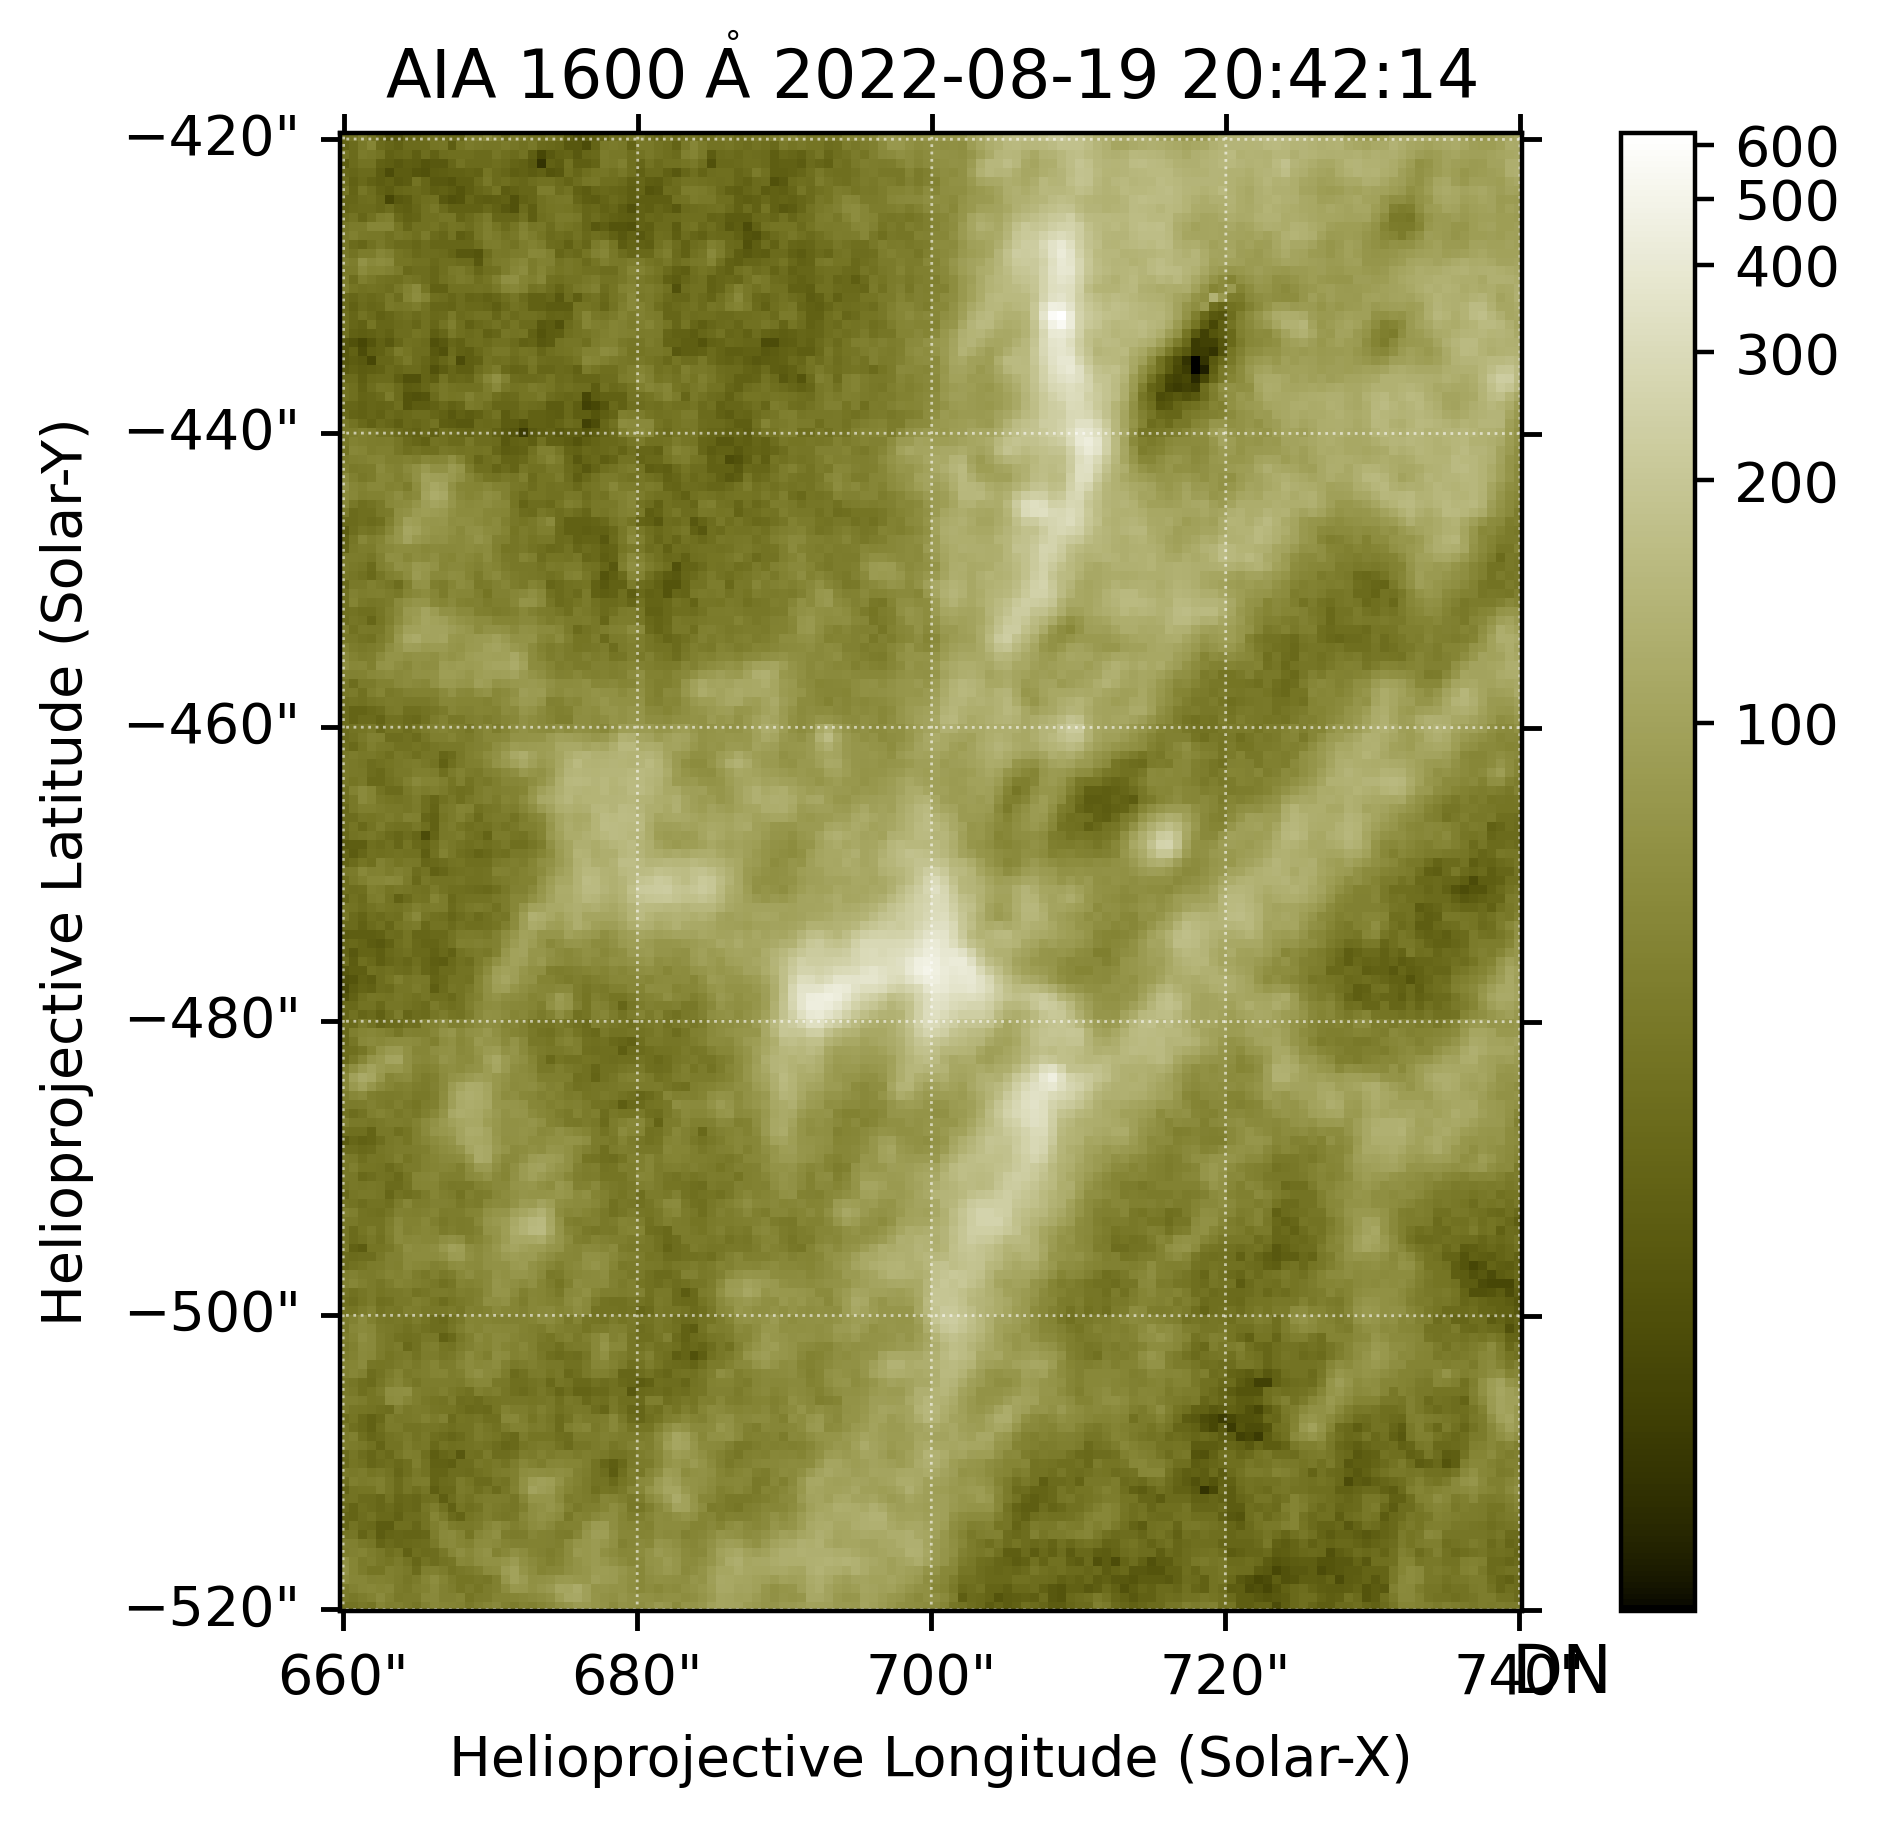

In [77]:
t_start = parse_time("2022-08-19T20:42:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 30 * u.s),
    a.Instrument.aia,
    a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_1600 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_1600.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_1600_cutout = m_1600.submap(blc, **fov)
m_1600_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2022_08_19T20_55_09.35Z.image_lev1.fits:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

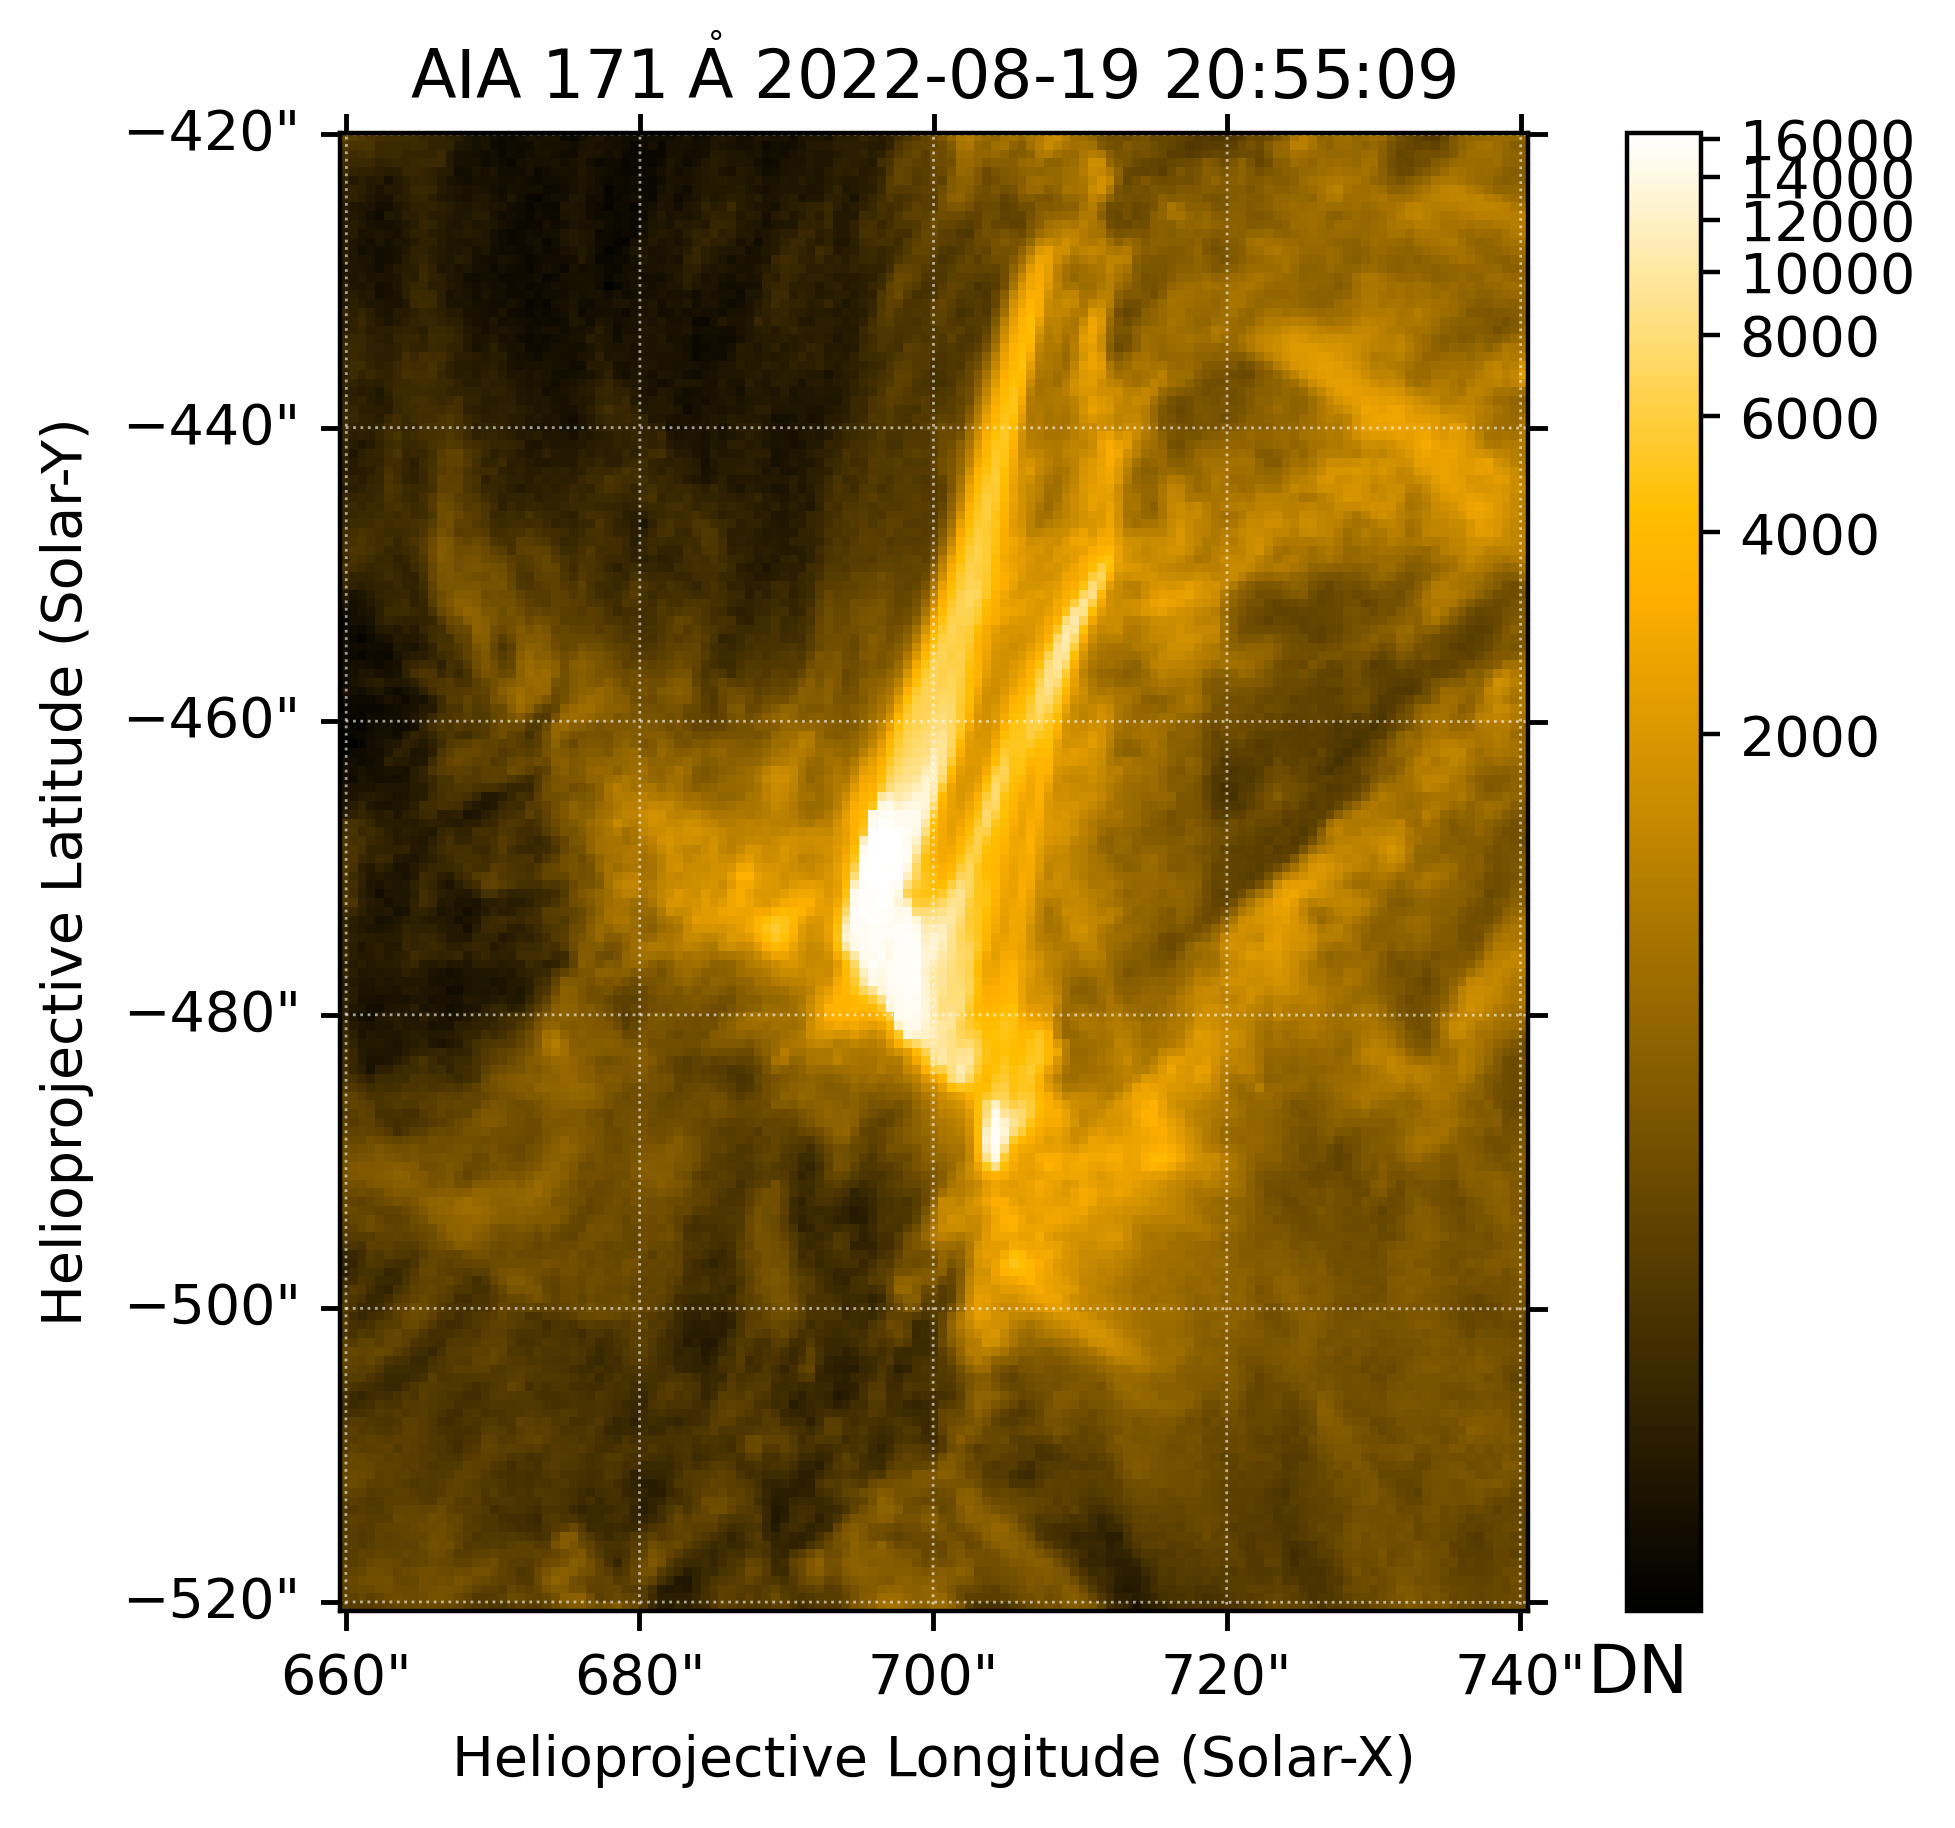

In [57]:
t_start = parse_time("2022-08-19T20:55:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_171 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_171.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_171_cutout = m_171.submap(blc, **fov)
m_171_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

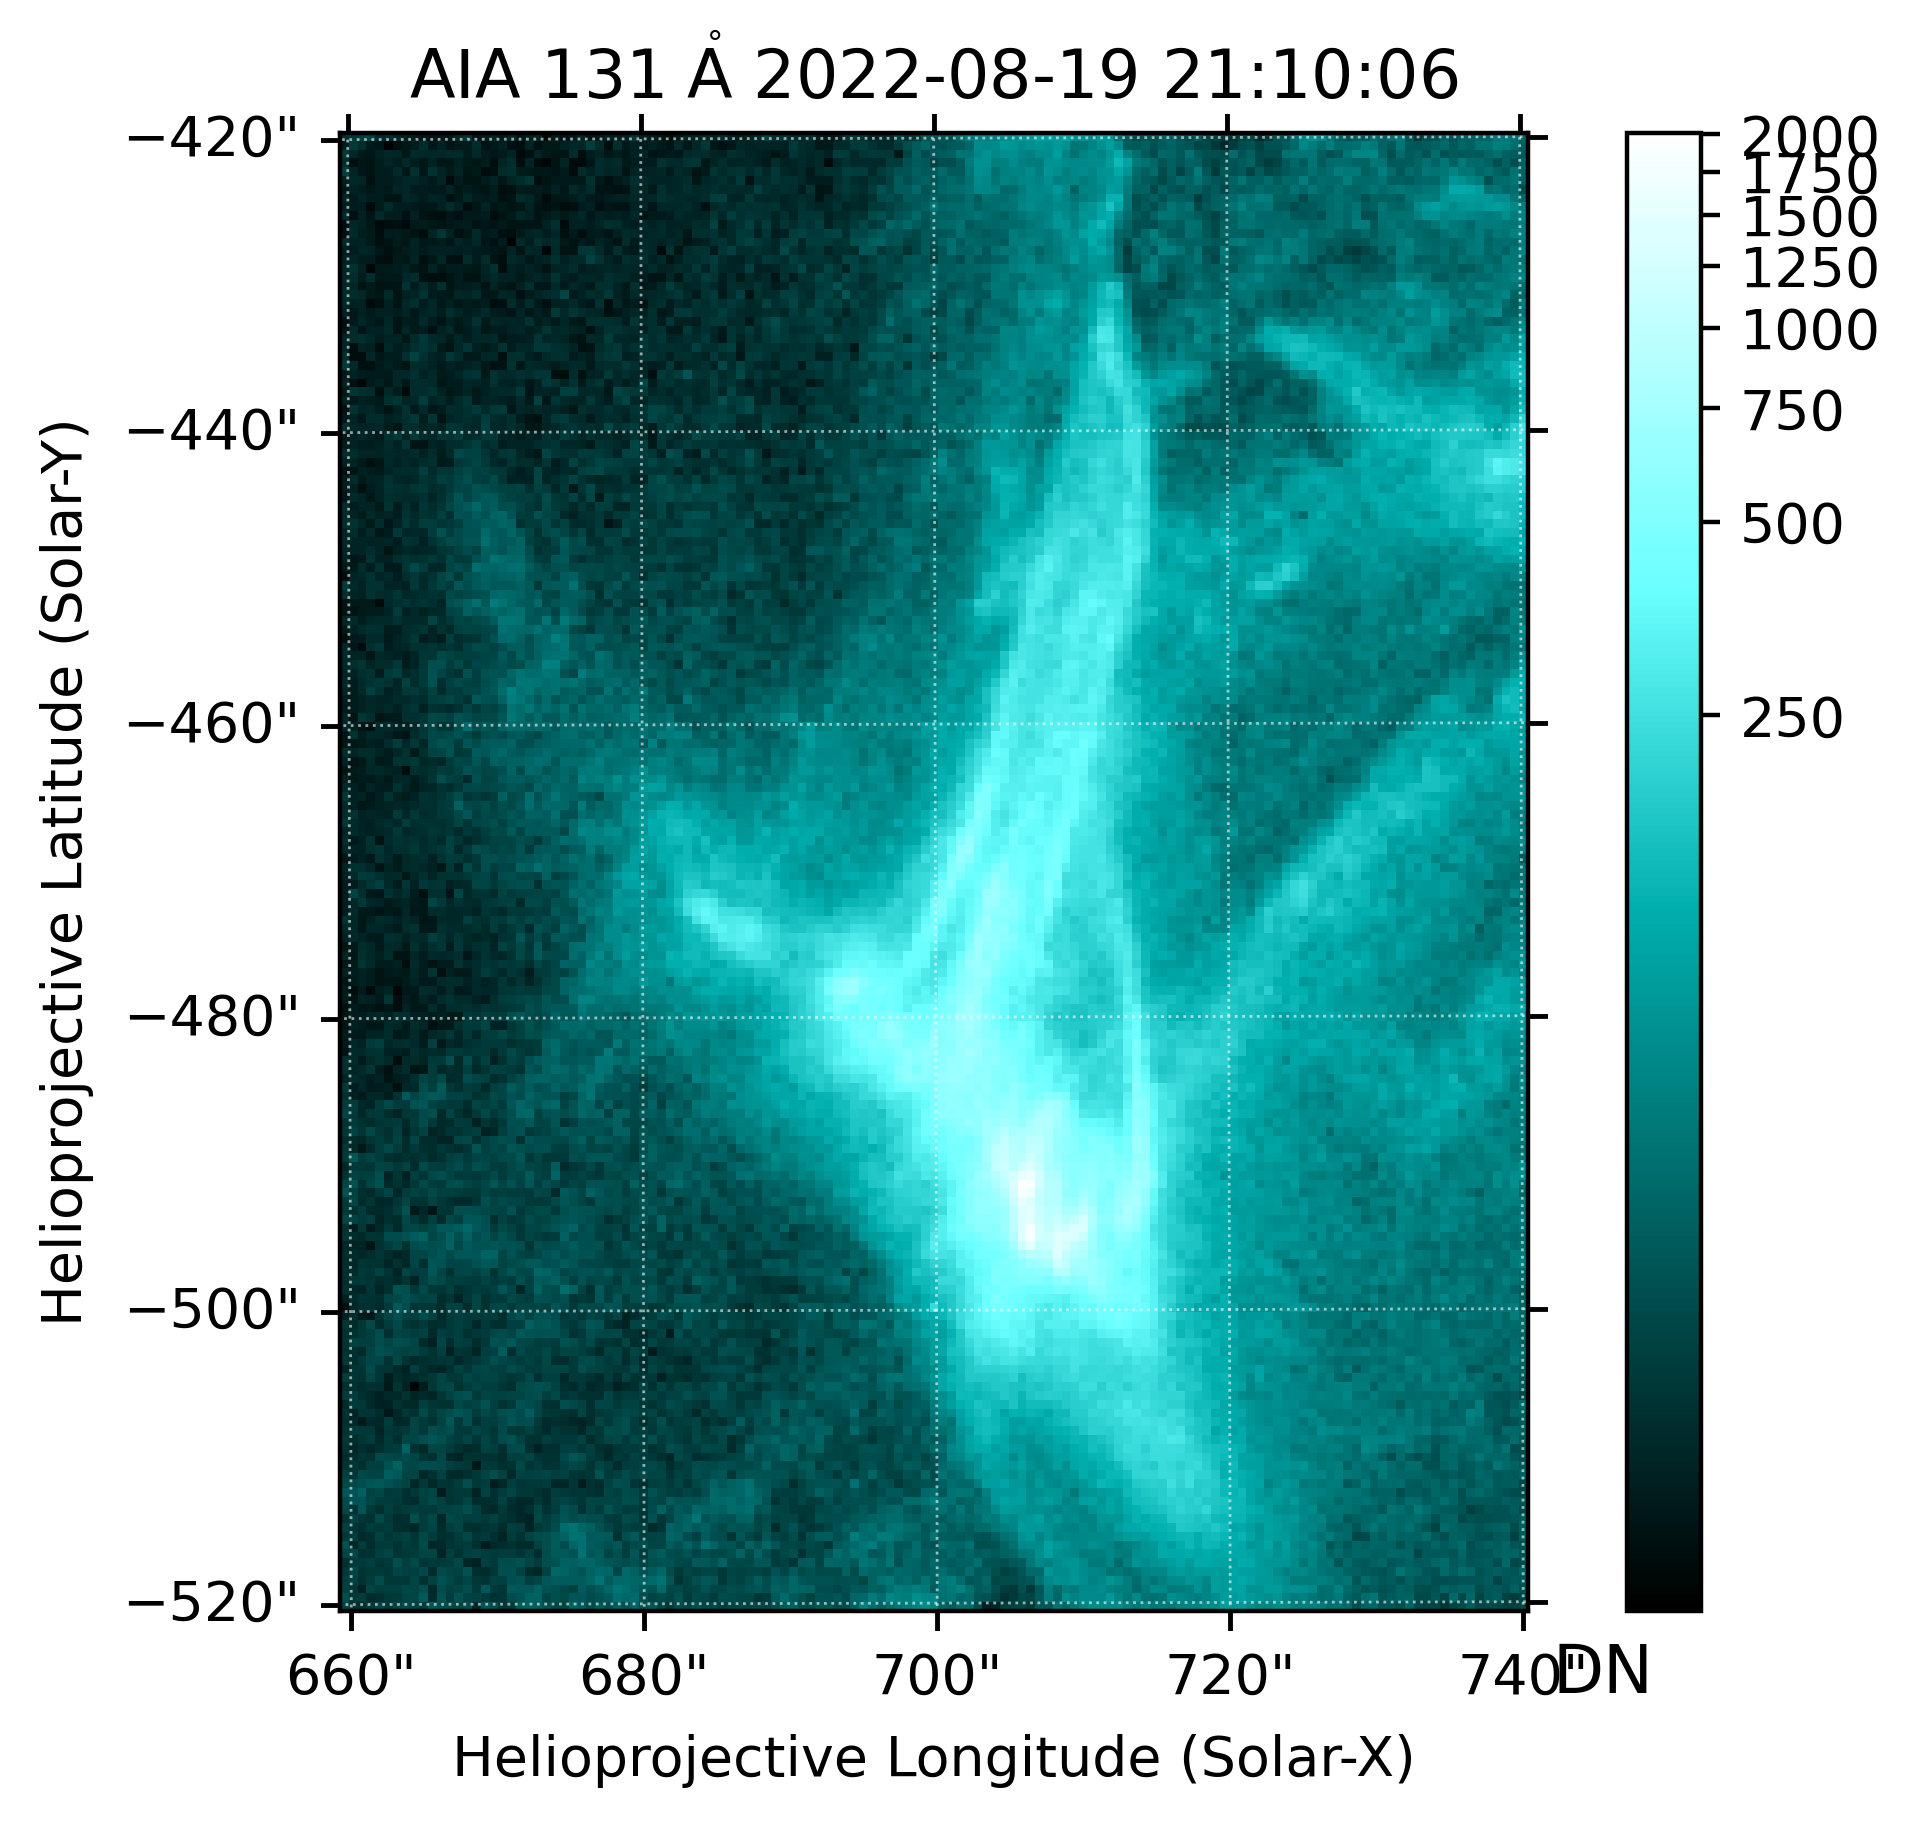

In [61]:
t_start = parse_time("2022-08-19T21:10:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(131 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_131 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_131.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_131_cutout = m_131.submap(blc, **fov)
m_131_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.1600A_2022_08_19T21_10_14.13Z.image_lev1.fits:   0%|          | 0.00/8.63M [00:00<?, ?B/s]

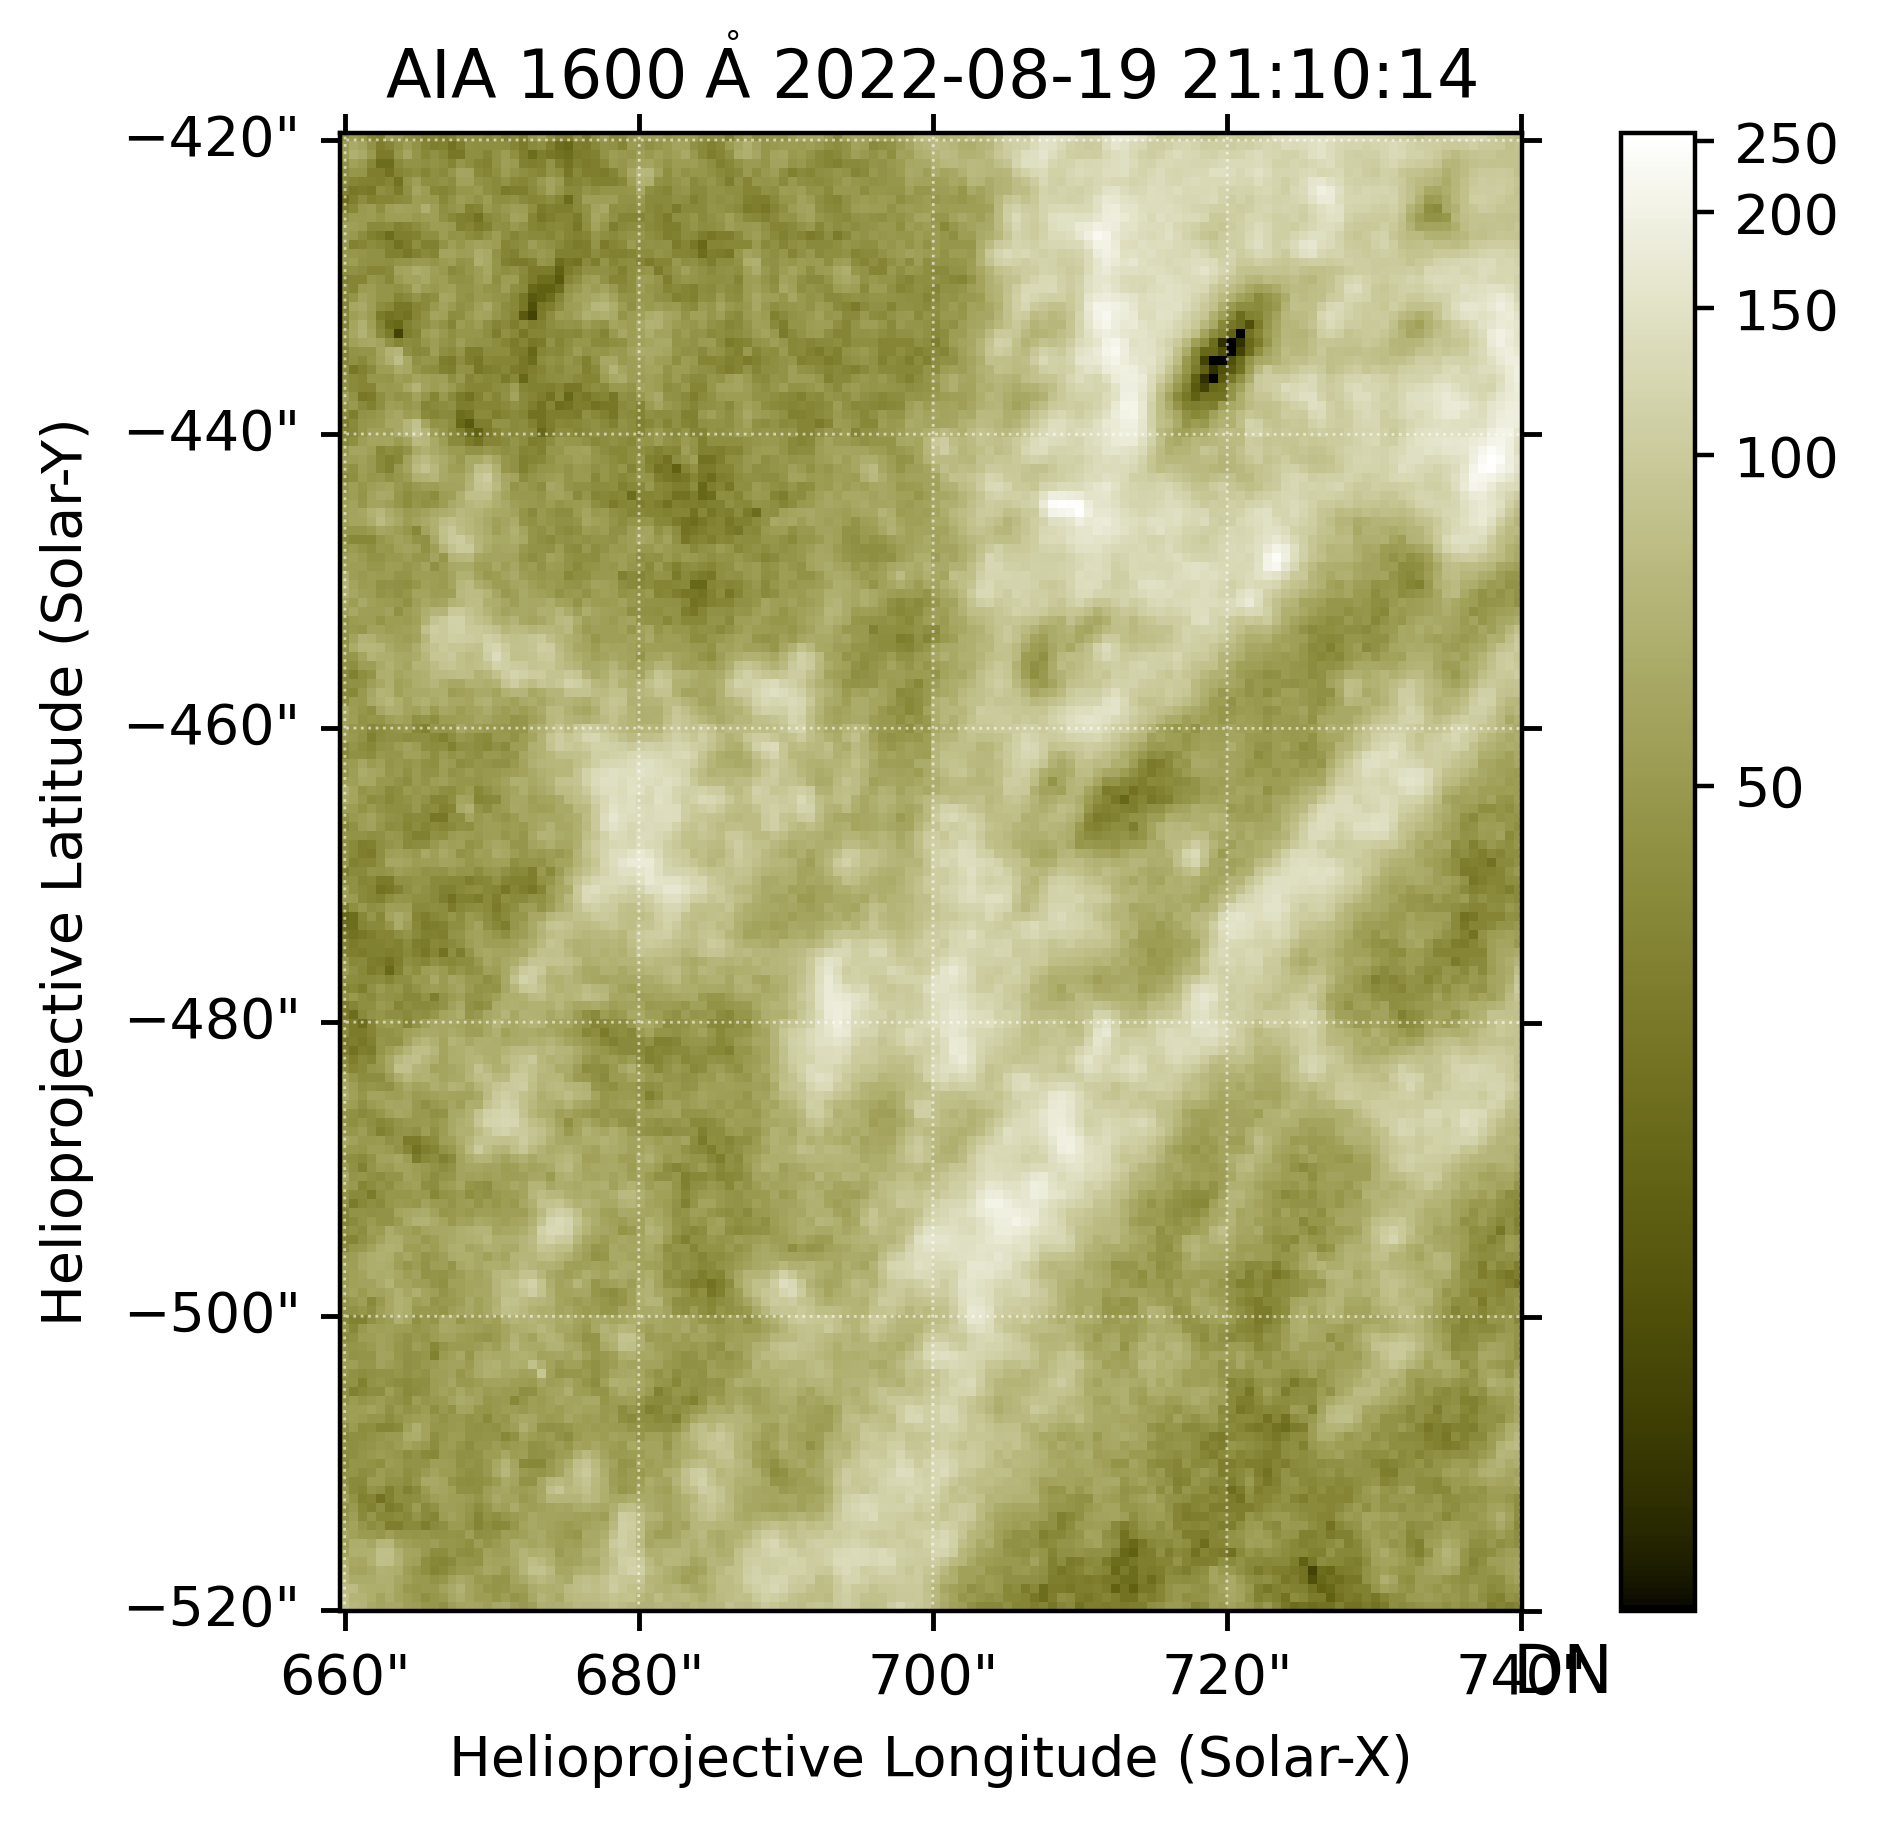

In [79]:
t_start = parse_time("2022-08-19T21:10:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 30 * u.s),
    a.Instrument.aia,
    a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_1600 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_1600.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_1600_cutout = m_1600.submap(blc, **fov)
m_1600_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2022_08_19T21_10_09.35Z.image_lev1.fits:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

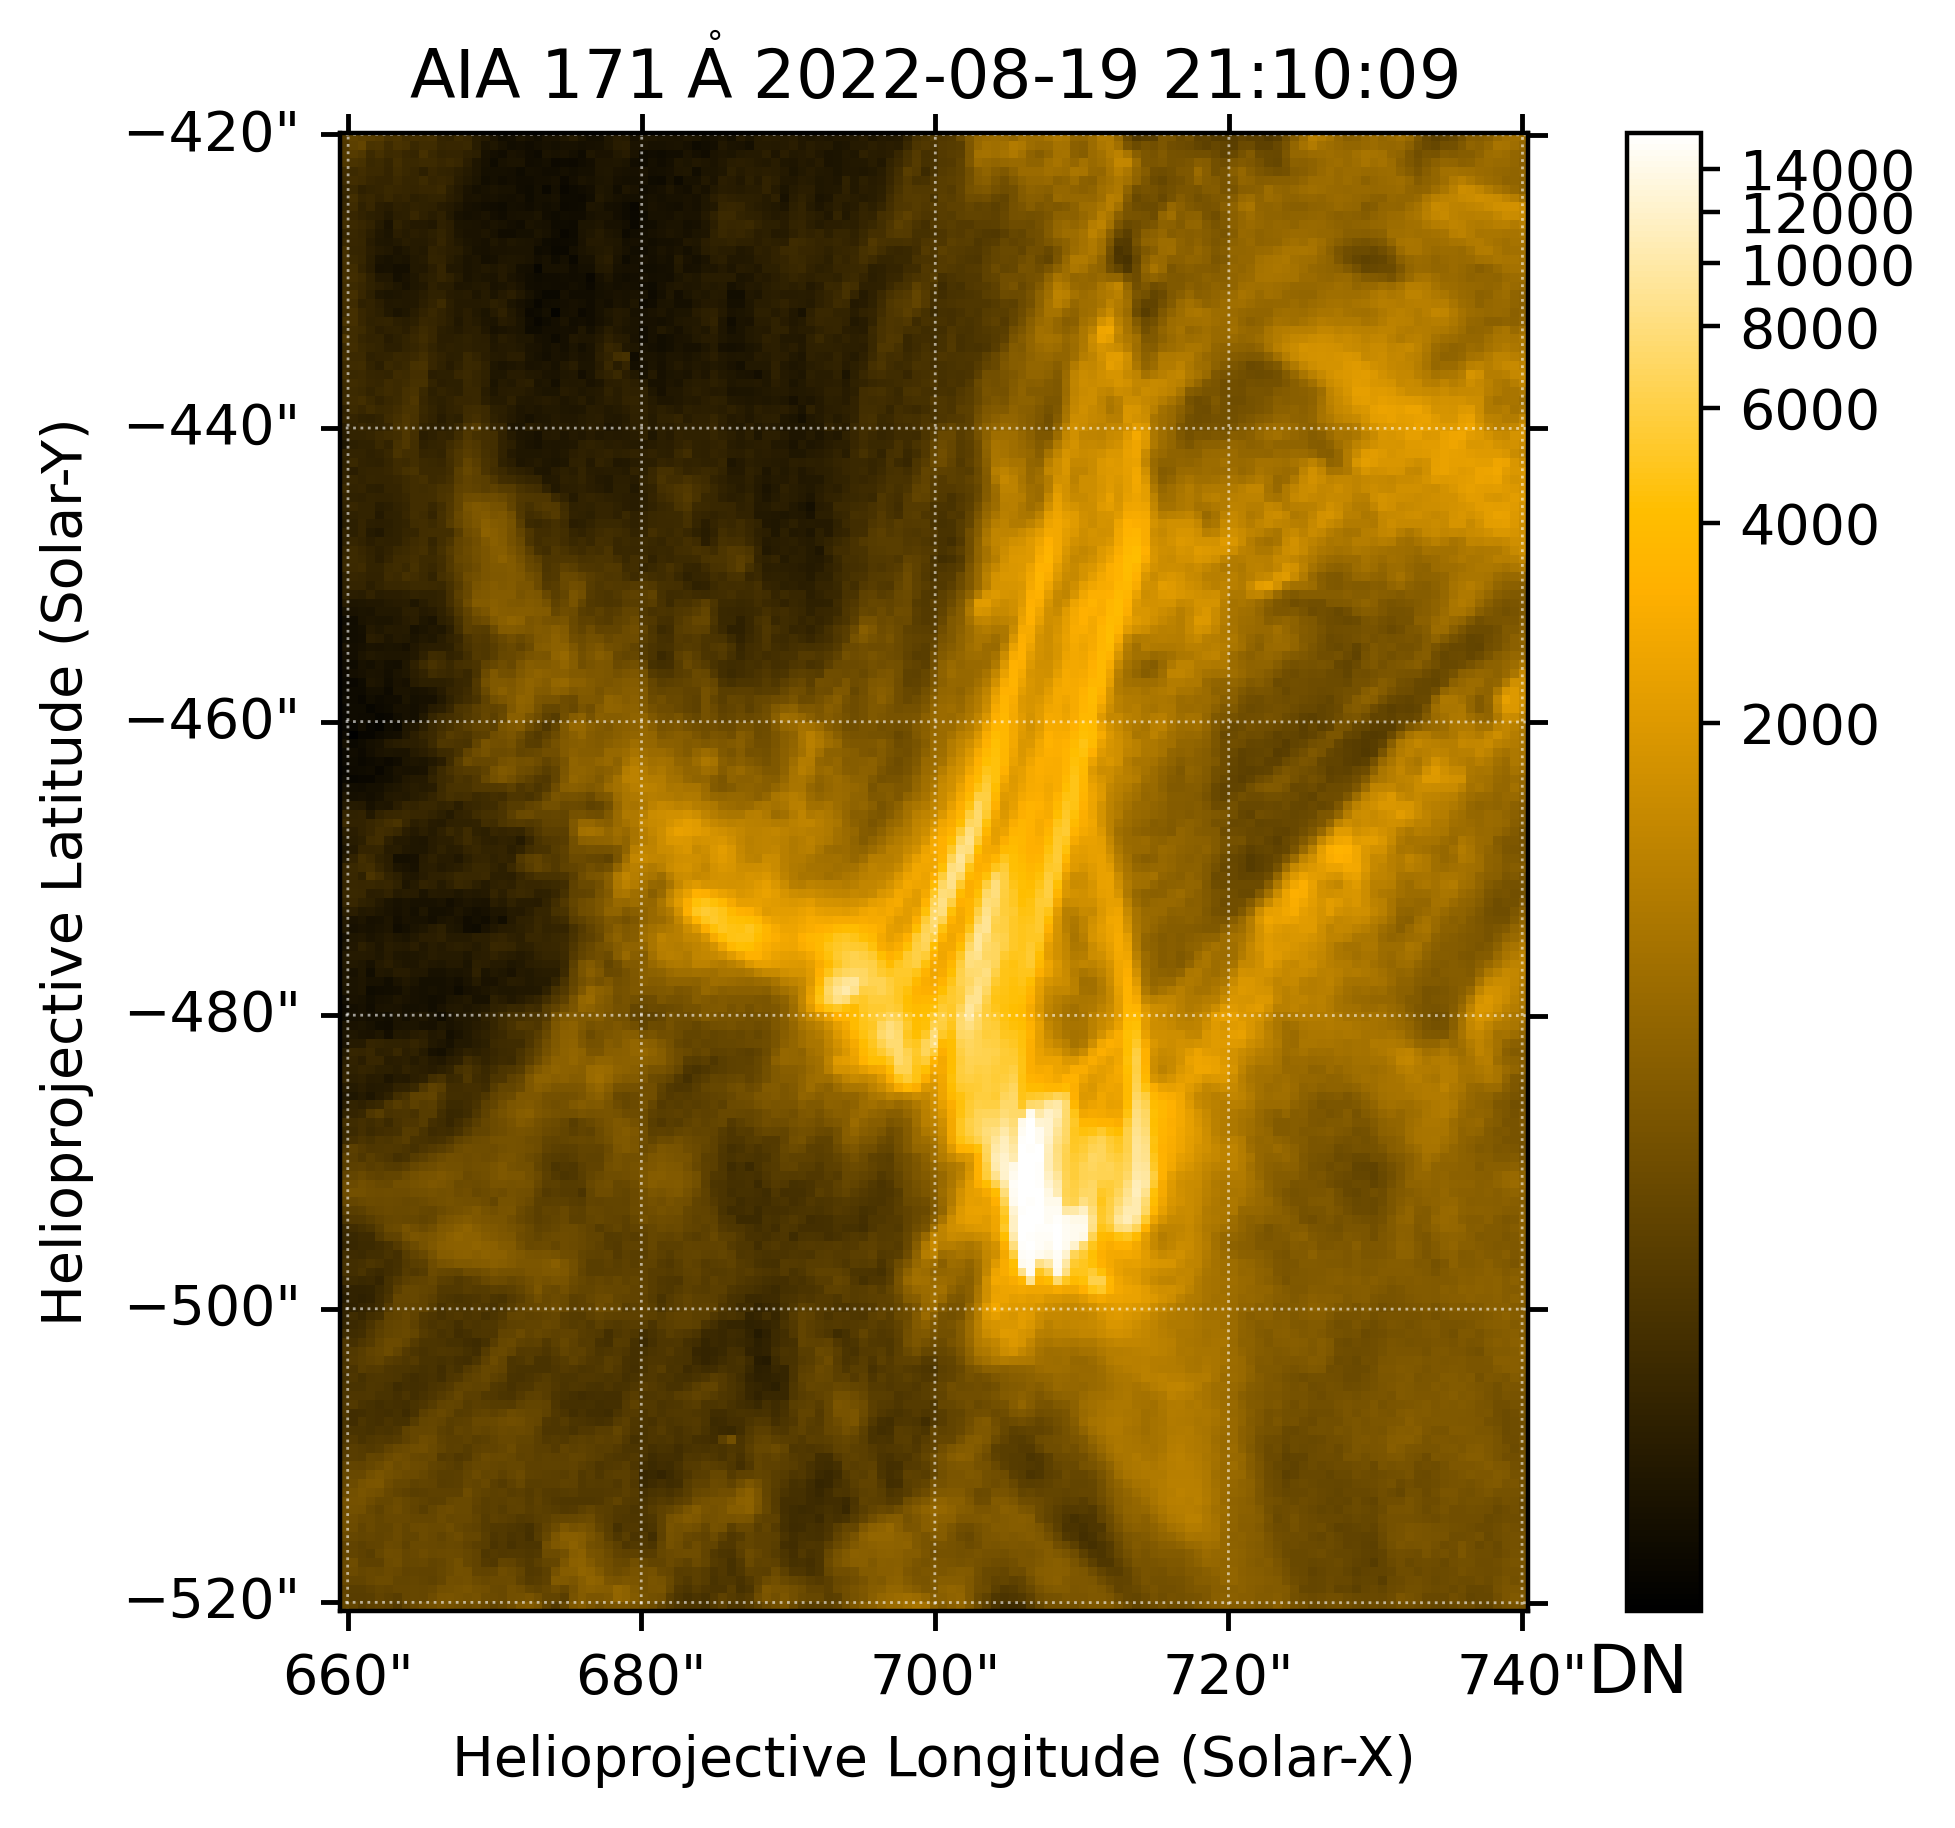

In [62]:
t_start = parse_time("2022-08-19T21:10:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_171 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_171.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_171_cutout = m_171.submap(blc, **fov)
m_171_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.131A_2022_08_19T21_30_06.63Z.image_lev1.fits:   0%|          | 0.00/8.27M [00:00<?, ?B/s]

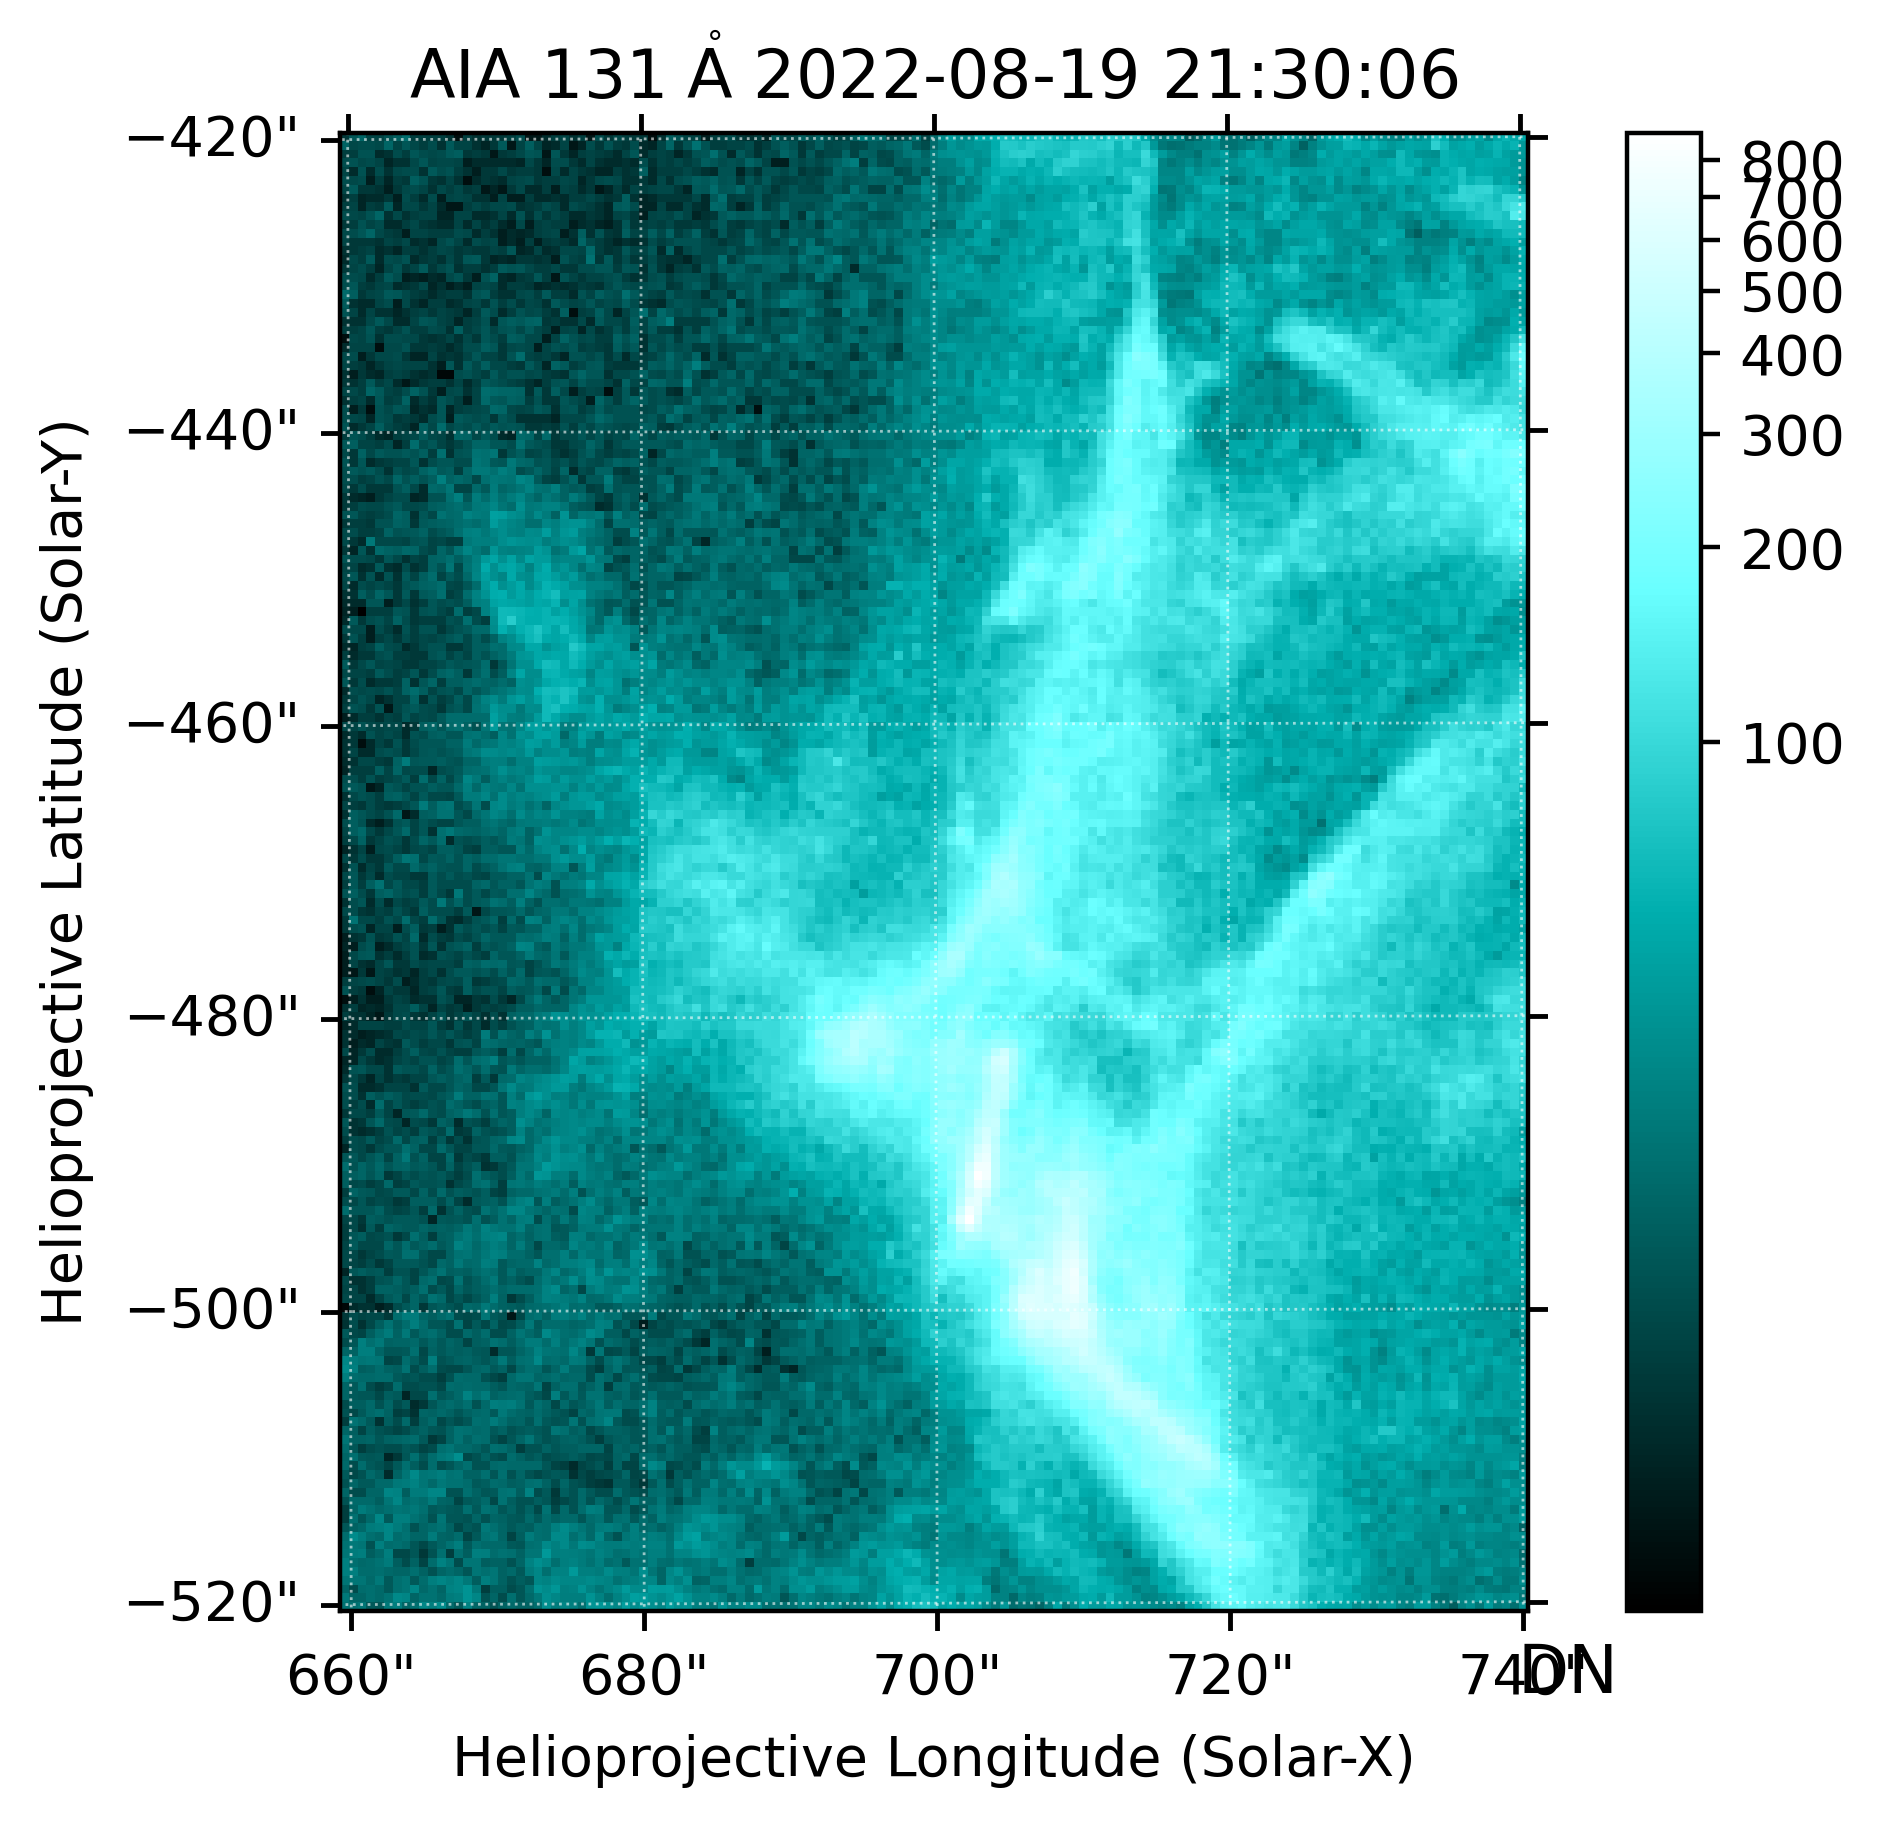

In [69]:
t_start = parse_time("2022-08-19T21:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(131 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_131 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_131.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_131_cutout = m_131.submap(blc, **fov)
m_131_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.1600A_2022_08_19T21_30_14.13Z.image_lev1.fits:   0%|          | 0.00/8.63M [00:00<?, ?B/s]

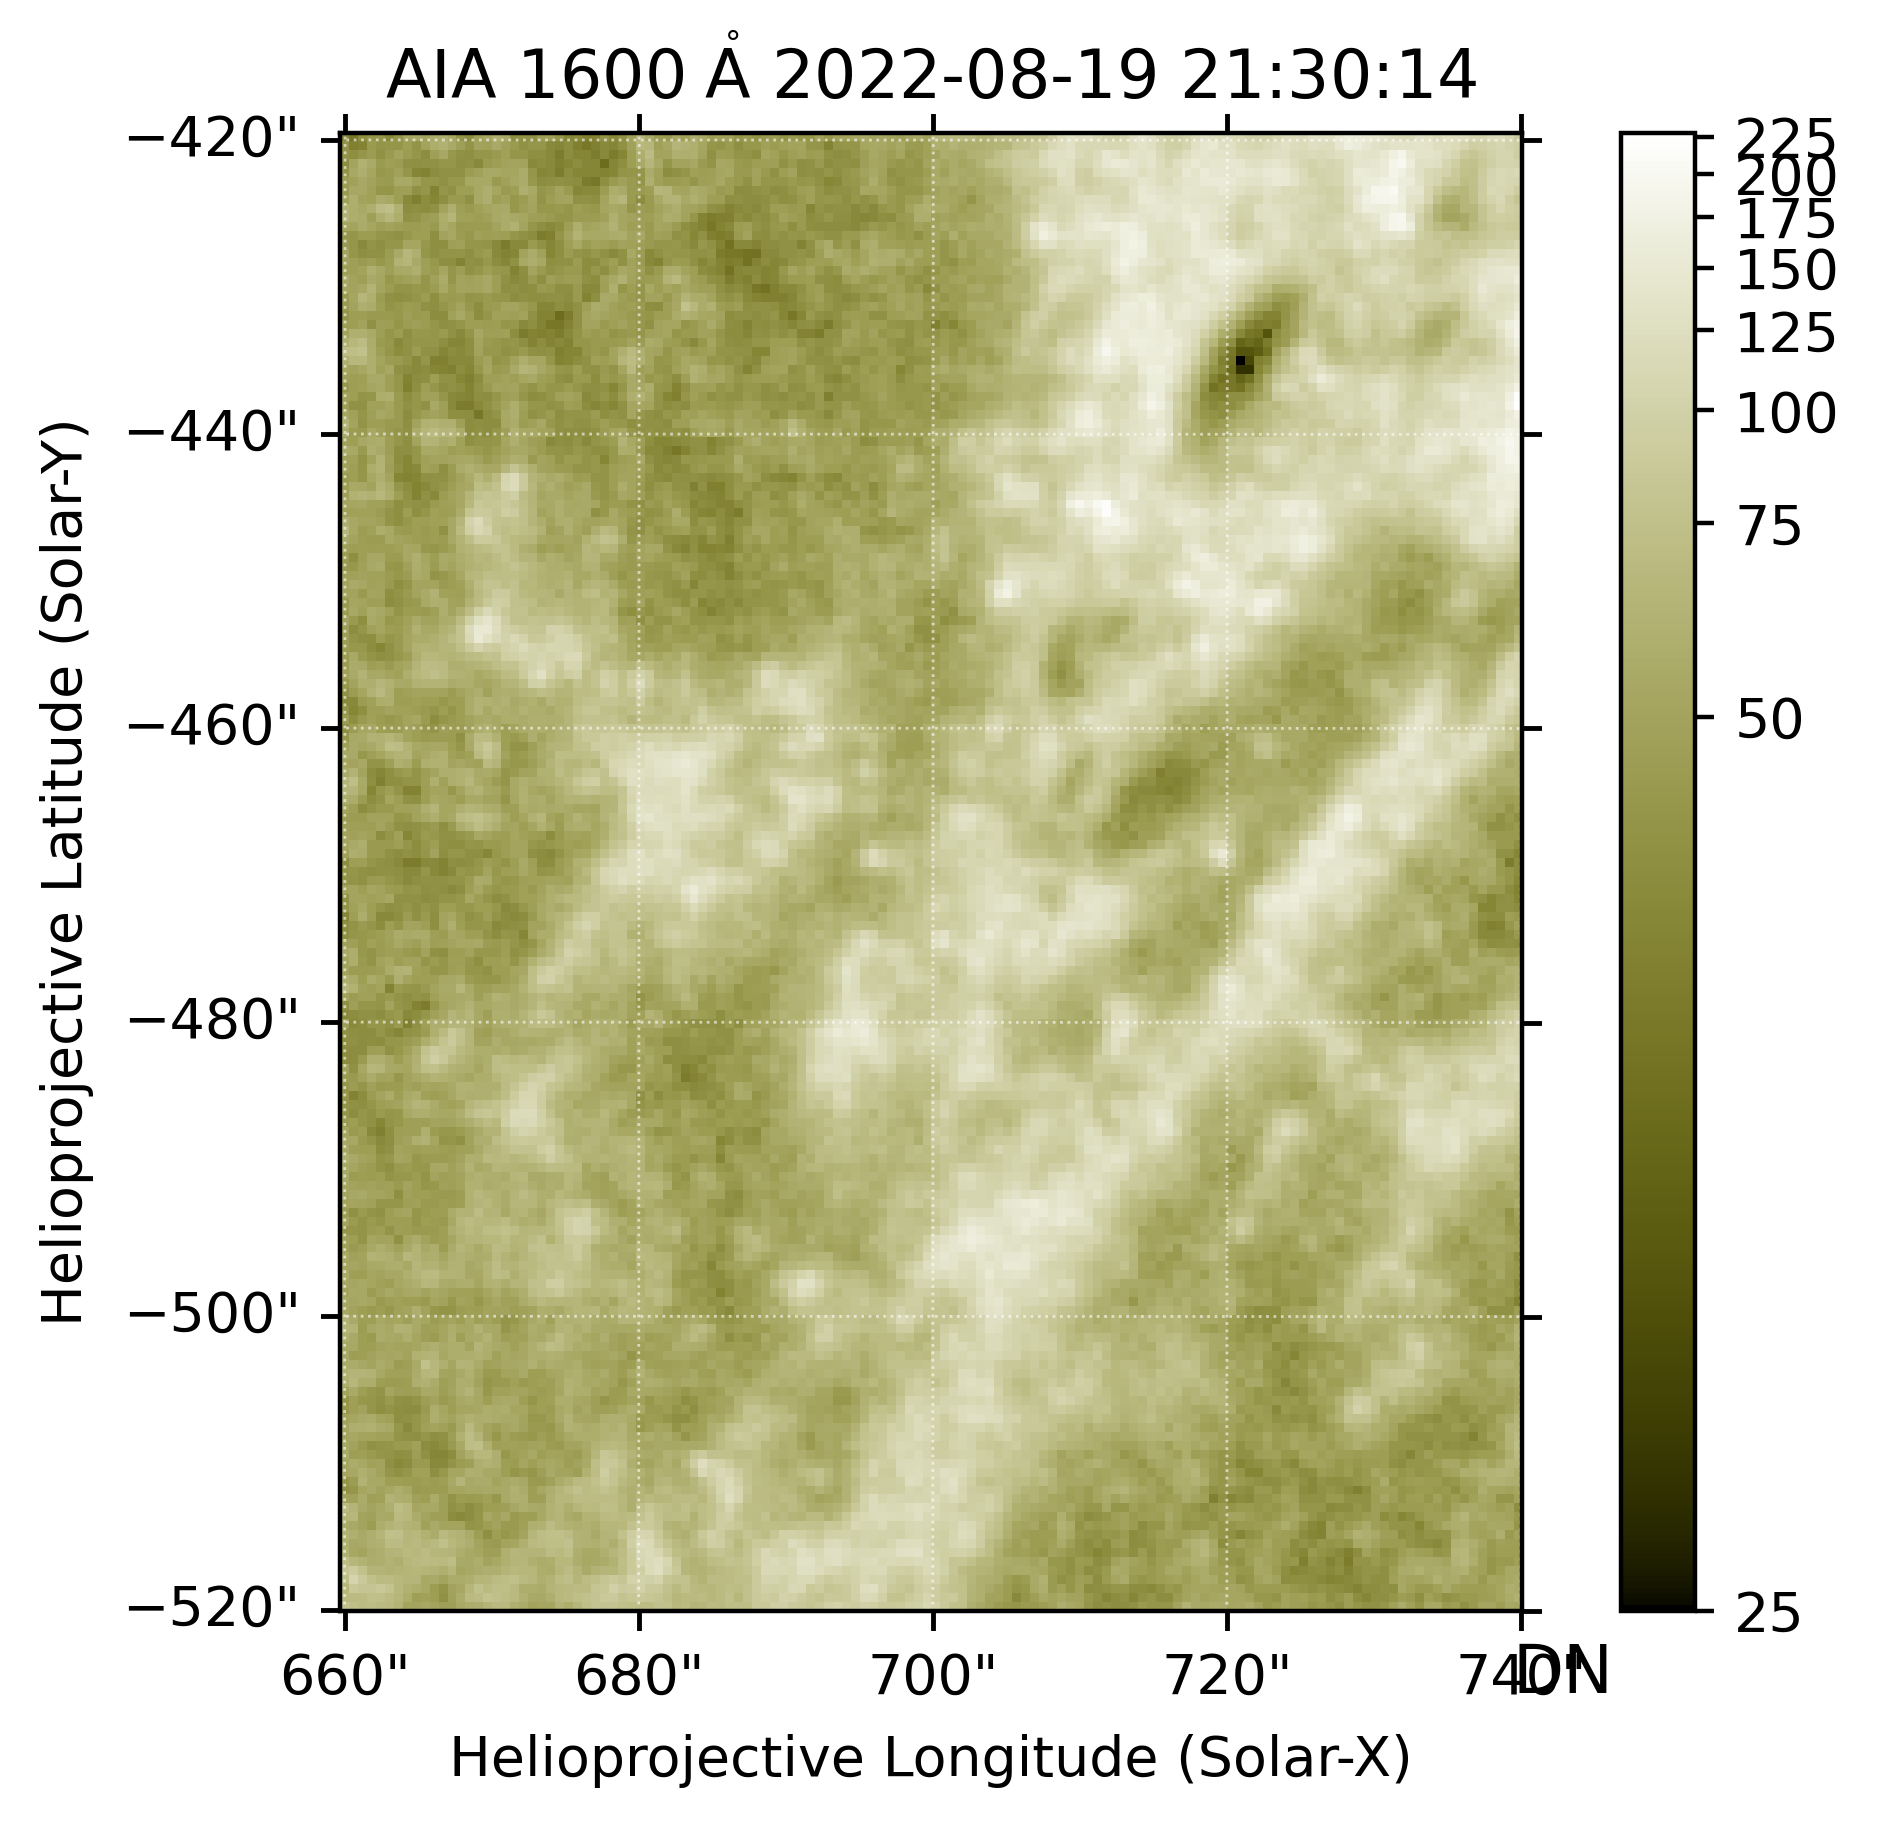

In [80]:
t_start = parse_time("2022-08-19T21:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 30 * u.s),
    a.Instrument.aia,
    a.Wavelength(1600 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_1600 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_1600.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_1600_cutout = m_1600.submap(blc, **fov)
m_1600_cutout.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2022_08_19T21_30_09.35Z.image_lev1.fits:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

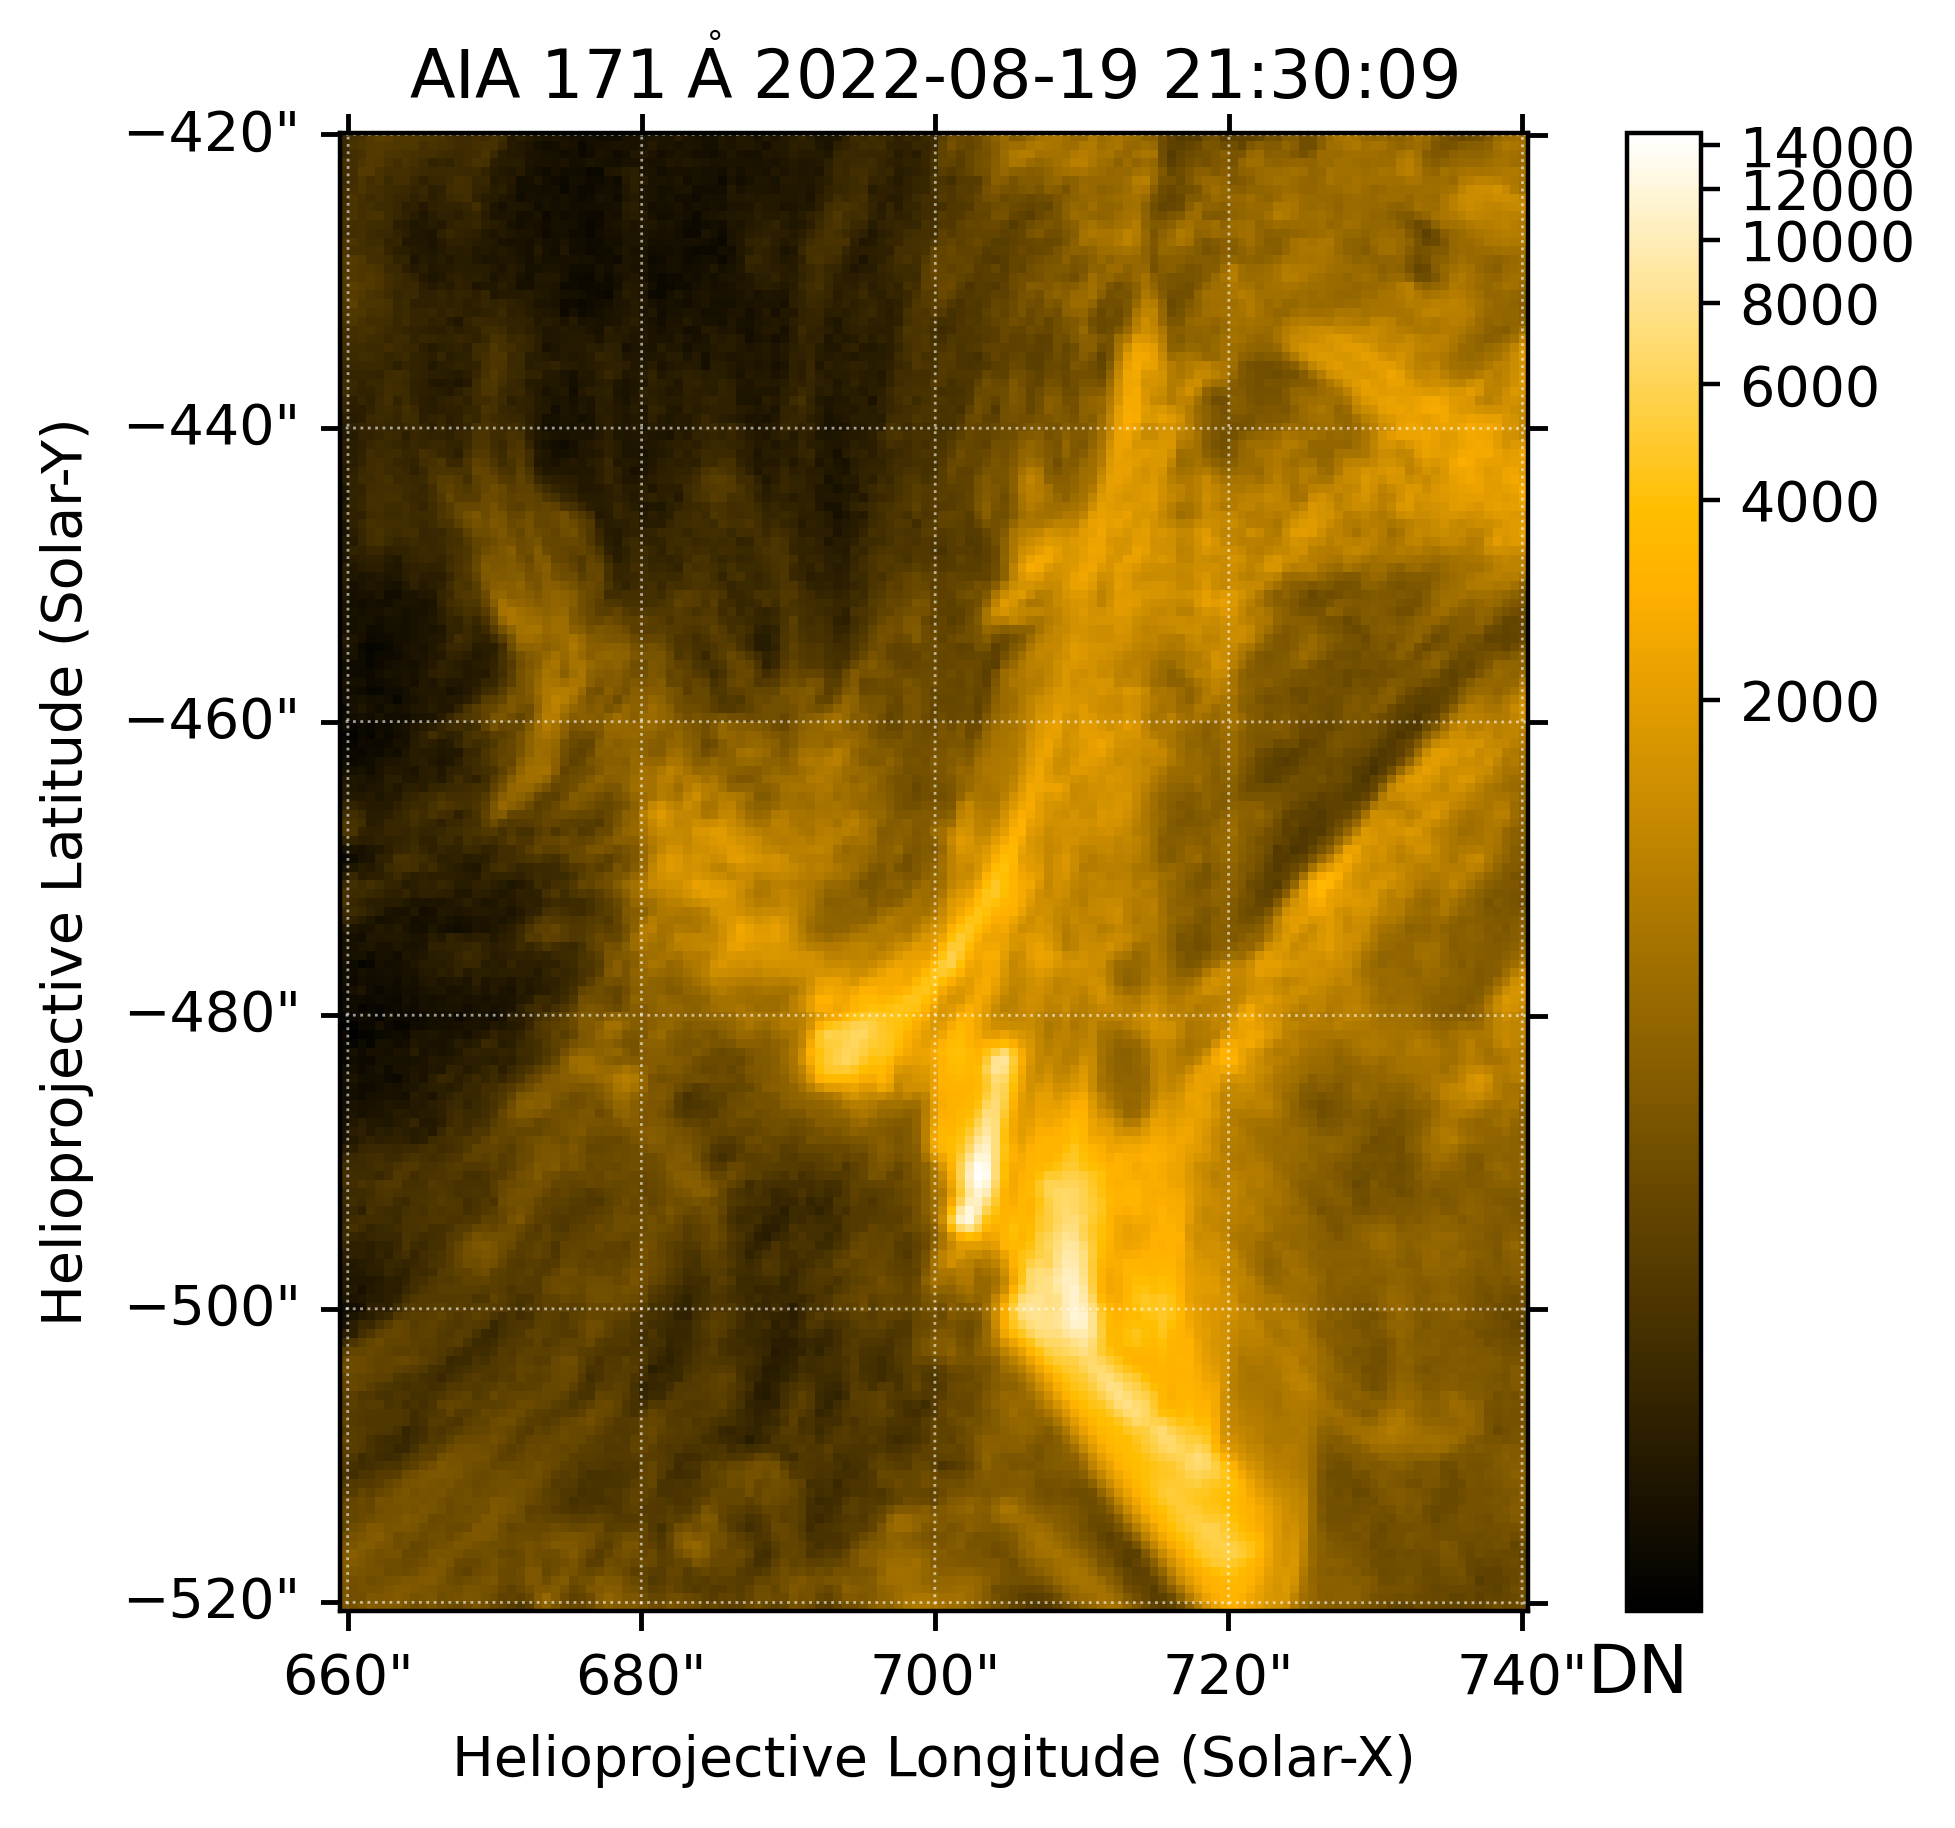

In [70]:
t_start = parse_time("2022-08-19T21:30:00")
search_results = Fido.search(
    a.Time(t_start, t_start + 12 * u.s),
    a.Instrument.aia,
    a.Wavelength(171 * u.angstrom),
)
files = Fido.fetch(search_results, max_conn=1)
m_171 = sunpy.map.Map(files[0])
blc = SkyCoord(660, -520, unit="arcsec", frame=m_171.coordinate_frame)
fov = {"width": 80 * u.arcsec, "height": 100 * u.arcsec}
m_171_cutout = m_171.submap(blc, **fov)
m_171_cutout.peek()